In [4]:
import pandas as pd; from scipy import stats;

In [5]:
from phcalc import calc_pH

In [6]:
#file is named by 2 digit date m, d, y and short name of VELMA run created in DOC check which is the precursor for the pH calculation
data_df=pd.read_csv('111821_WQX_Loss_08NOV21A.csv') #can change path -cp with true file directory but copying in this folder
#data_df['Alk_1000'] = 1000
data_df['Alk_140'] = 140
#data_df['DOC_g/m3'] = data_df['DOC_Pool(gC/m2)_Delineated_Average']/0.35
#data_df['DOC_g/m3_run'] = data_df['DOC_Pool(gC/m2)_Delineated_Average']/data_df['Runoff_All(mm/day)_Delineated_Average']
#data_df['CO2_2'] = data_df['DOC_g/m3']/4
data_df.head()

Unnamed: 0  Year  DON_Loss(gN/day/m2)_Delineated_Average  \
0           0  1998                                0.001146   
1           1  1998                                0.000104   
2           2  1998                                0.000071   
3           3  1998                                0.000060   
4           4  1998                                0.000052   

   NH4_Loss(gN/day/m2)_Delineated_Average  \
0                                0.000026   
1                                0.000003   
2                                0.000002   
3                                0.000002   
4                                0.000001   

   NO3_Loss(gN/day/m2)_Delineated_Average  \
0                                0.000128   
1                                0.000011   
2                                0.000007   
3                                0.000006   
4                                0.000005   

   Runoff_All(mm/day)_Delineated_Average  \
0                               3.575873   
1                               0.725718   
2                               0.445550   
3                               0.409570   
4                               0.383245   

   DOC_Loss(gC/day/m2)_Delineated_Average  Step  DOC_mg/L  Sfc_Water_Temp_C  \
0                                0.038477     0  0.109935            2.6375   
1                                0.003461     1  0.009887            3.3125   
2                                0.002371     2  0.006773            0.7625   
3                                0.001990     3  0.005685            0.0875   
4                                0.001735     4  0.004958            3.0875   

        CO2  Alk_140  
0  0.027484      140  
1  0.002472      140  
2  0.001693      140  
3  0.001421      140  
4  0.001240      140

In [7]:
#Check for any zero runoff days should equal 0
data_df.loc[data_df['Runoff_All(mm/day)_Delineated_Average'] ==0]

Empty DataFrame
Columns: [Unnamed: 0, Year, DON_Loss(gN/day/m2)_Delineated_Average, NH4_Loss(gN/day/m2)_Delineated_Average, NO3_Loss(gN/day/m2)_Delineated_Average, Runoff_All(mm/day)_Delineated_Average, DOC_Loss(gC/day/m2)_Delineated_Average, Step, DOC_mg/L, Sfc_Water_Temp_C, CO2, Alk_140]
Index: []

In [8]:
pools_di=pd.read_csv('BC08NOV21AWQDI_pHcalc.csv') #need to change paths or copy and paste file in dir

In [9]:
#VELMA Simulation focusing on Water Quality Parameters Before renaming as concentrations
pools_di.drop(columns={'Unnamed: 0','Criteria', 'Condition'})

DON_Pool(gN/m2)_Delineated_Average  DOC_Pool(gC/m2)_Delineated_Average  \
0                               4.914788                          178.332923   
1                               4.915756                          178.490644   
2                               4.916769                          178.652420   
3                               4.917760                          178.812267   
4                               4.918732                          178.964615   
...                                  ...                                 ...   
1973                            6.078285                          370.814601   
1974                            6.078472                          370.828160   
1975                            6.078661                          370.842372   
1976                            6.078855                          370.865653   
1977                            6.079035                          370.878906   

      NH4_Pool(gN/m2)_Delineated_Average  NO3_Pool(gN/m2)_Delineated_Average  \
0                               0.653125                            0.017828   
1                               0.656919                            0.018524   
2                               0.652829                            0.018773   
3                               0.649688                            0.018661   
4                               0.648913                            0.018417   
...                                  ...                                 ...   
1973                            3.660450                            0.931004   
1974                            3.673347                            0.931005   
1975                            3.685559                            0.930988   
1976                            3.698196                            0.931007   
1977                            3.709904                            0.931005   

      Step  Runoff_All(mm/day)_Delineated_Average  Sfc_Water_Temp_C  
0     1309                               0.014678         20.112500  
1     1310                               0.022895         19.737500  
2     1311                               0.028913         19.962502  
3     1312                               0.020604         19.812500  
4     1313                               0.015854         19.287498  
...    ...                                    ...               ...  
1973  3282                               0.006345         -1.562500  
1974  3283                               0.006192         -2.837500  
1975  3284                               0.006042         -0.812500  
1976  3285                               0.005902          4.512500  
1977  3286                               0.005772         -2.087500  

[1978 rows x 7 columns]

In [12]:
#Defining Percentiles list for tails and distrubition interval
perc = [0.1, 0.25, 0.5, .75, .9]

In [13]:
pools_di.drop(columns={'Unnamed: 0', 'Sfc_Water_Temp_C', 'Criteria', 'Condition'}).describe(percentiles =perc)

DON_Pool(gN/m2)_Delineated_Average  DOC_Pool(gC/m2)_Delineated_Average  \
count                         1978.000000                         1978.000000   
mean                             5.464506                          271.748678   
std                              0.338833                           57.644098   
min                              4.914788                          178.332923   
10%                              5.002670                          189.913659   
25%                              5.175361                          222.879132   
50%                              5.433293                          268.087943   
75%                              5.762568                          323.910877   
90%                              5.916044                          347.016955   
max                              6.079035                          370.878906   

       NH4_Pool(gN/m2)_Delineated_Average  NO3_Pool(gN/m2)_Delineated_Average  \
count                         1978.000000                         1978.000000   
mean                             2.915789                            0.595308   
std                              1.171216                            0.356464   
min                              0.635450                            0.001144   
10%                              1.065405                            0.003425   
25%                              2.102946                            0.318845   
50%                              2.928283                            0.620873   
75%                              3.806810                            0.847796   
90%                              4.518043                            1.029676   
max                              4.974419                            1.501369   

              Step  Runoff_All(mm/day)_Delineated_Average  
count  1978.000000                            1978.000000  
mean   2297.500000                               0.062458  
std     571.143736                               0.600690  
min    1309.000000                               0.000163  
10%    1506.700000                               0.001438  
25%    1803.250000                               0.005755  
50%    2297.500000                               0.016546  
75%    2791.750000                               0.044610  
90%    3088.300000                               0.118245  
max    3286.000000                              26.255495

In [14]:
#Loss Stats 
data_df.describe(percentiles=perc).drop(columns='Year')

Unnamed: 0  DON_Loss(gN/day/m2)_Delineated_Average  \
count  3287.000000                            3.287000e+03   
mean   1643.000000                            1.367522e-05   
std     949.019494                            3.595378e-05   
min       0.000000                            1.531147e-07   
10%     328.600000                            4.551896e-07   
25%     821.500000                            1.189261e-06   
50%    1643.000000                            4.681093e-06   
75%    2464.500000                            1.333792e-05   
90%    2957.400000                            3.263426e-05   
max    3286.000000                            1.146204e-03   

       NH4_Loss(gN/day/m2)_Delineated_Average  \
count                            3.287000e+03   
mean                             2.273768e-06   
std                              7.169855e-06   
min                              1.088731e-09   
10%                              1.042981e-08   
25%                              4.258854e-08   
50%                              2.982597e-07   
75%                              1.550686e-06   
90%                              5.229984e-06   
max                              1.624303e-04   

       NO3_Loss(gN/day/m2)_Delineated_Average  \
count                            3.287000e+03   
mean                             3.364361e-06   
std                              1.220973e-05   
min                              1.490396e-11   
10%                              2.183020e-10   
25%                              1.307555e-09   
50%                              1.791758e-07   
75%                              1.558147e-06   
90%                              7.772628e-06   
max                              2.512616e-04   

       Runoff_All(mm/day)_Delineated_Average  \
count                            3287.000000   
mean                                0.045830   
std                                 0.472027   
min                                 0.000014   
10%                                 0.000240   
25%                                 0.001181   
50%                                 0.008562   
75%                                 0.030329   
90%                                 0.088680   
max                                26.255495   

       DOC_Loss(gC/day/m2)_Delineated_Average         Step     DOC_mg/L  \
count                             3287.000000  3287.000000  3287.000000   
mean                                 0.001164  1643.000000     0.003325   
std                                  0.002985   949.019494     0.008529   
min                                  0.000010     0.000000     0.000029   
10%                                  0.000028   328.600000     0.000081   
25%                                  0.000083   821.500000     0.000236   
50%                                  0.000413  1643.000000     0.001180   
75%                                  0.001189  2464.500000     0.003398   
90%                                  0.002718  2957.400000     0.007766   
max                                  0.107535  3286.000000     0.307244   

       Sfc_Water_Temp_C          CO2  Alk_140  
count       3287.000000  3287.000000   3287.0  
mean          11.248536     0.000831    140.0  
std            6.931090     0.002132      0.0  
min          -10.562500     0.000007    140.0  
10%            2.262500     0.000020    140.0  
25%            5.787500     0.000059    140.0  
50%           11.112499     0.000295    140.0  
75%           17.712502     0.000850    140.0  
90%           20.412498     0.001941    140.0  
max           24.087502     0.076811    140.0

In [15]:
stats.describe(data_df['DOC_Loss(gC/day/m2)_Delineated_Average'])

DescribeResult(nobs=3287, minmax=(1.0184920029132629e-05, 0.1075353026390075), mean=0.0011636895334041937, variance=8.91024231536225e-06, skewness=16.71526151085865, kurtosis=511.45554815358776)

In [16]:
stats.describe(data_df['DOC_mg/L'])

DescribeResult(nobs=3287, minmax=(2.909977151180751e-05, 0.3072437218257357), mean=0.0033248272382977177, variance=7.273667196214056e-05, skewness=16.715261510858717, kurtosis=511.45554815359094)

In [17]:
"""these are corrected columns needed for pH calculation...."""
row=data_df.iloc[0,:]
[row['CO2'],row['Sfc_Water_Temp_C'],row['DOC_mg/L'], row['Alk_140']]

[0.0274836351828915, 2.6374998, 0.1099345407315663, 140.0]

In [18]:
215/(12*0.35)

51.1904761904762

In [19]:
"""This works, but the next is better if you need the calculation back in the dataframe"""
id_list =[]; row_list =[];
for row_id,row in data_df.iterrows():
    row_list.append(calc_pH(row['CO2'],row['Sfc_Water_Temp_C'],row['DOC_mg/L'], row['Alk_140']))
    id_list.append(row_id)

CO2 Estimate 0.6246280723384432
Exponent value 6.016535289304728
H2CO3 value 9.626417887704725e-07
pkw= 1e-14
Alpha value= 6.012930948721311e-07
SQRT of Alpha= 0.000775430909154472
A value 3.1104568917377766
B value 0.43429448190325176
C value 0.001550861818308944

CO2 Estimate 0.056177268088975
Exponent value 6.009650881250001
H2CO3 value 9.780231139797152e-07
pkw= 1e-14
Alpha value= 5.494267667125262e-08
SQRT of Alpha= 0.00023439854238295216
A value 3.6300450933237793
B value 0.43429448190325176
C value 0.00046879708476590433

CO2 Estimate 0.038485280117138636
Exponent value 6.036186488318765
H2CO3 value 9.200544107479032e-07
pkw= 1e-14
Alpha value= 3.5408561720641985e-08
SQRT of Alpha= 0.00018817162836262533
A value 3.725445856862044
B value 0.43429448190325176
C value 0.00037634325672525066

CO2 Estimate 0.03229998665946364
Exponent value 6.043450946767136
H2CO3 value 9.047926276090163e-07
pkw= 1e-14
Alpha value= 2.922479980135228e-08
SQRT of Alpha= 0.00017095262443540398
A value 3

Exponent value 5.95221831725
H2CO3 value 1.1163019483691394e-06
pkw= 1e-14
Alpha value= 4.366478525126139e-08
SQRT of Alpha= 0.0002089612051344971
A value 3.679934335706739
B value 0.43429448190325176
C value 0.0004179224102689942

CO2 Estimate 0.036290307021275
Exponent value 5.95024767725
H2CO3 value 1.1213787519124712e-06
pkw= 1e-14
Alpha value= 4.069518919403776e-08
SQRT of Alpha= 0.00020173048652605228
A value 3.6952284640602686
B value 0.43429448190325176
C value 0.00040346097305210457

CO2 Estimate 0.026340852642743183
Exponent value 6.024302618293925
H2CO3 value 9.455780488372846e-07
pkw= 1e-14
Alpha value= 2.4907342046635532e-08
SQRT of Alpha= 0.00015782060083092934
A value 3.8018363075699395
B value 0.43429448190325176
C value 0.0003156412016618587

CO2 Estimate 0.021190468717799997
Exponent value 6.052466348351884
H2CO3 value 8.862038892016877e-07
pkw= 1e-14
Alpha value= 1.8779085791721057e-08
SQRT of Alpha= 0.00013703680451514132
A value 3.8631627769954164
B value 0.4342944

CO2 Estimate 0.0018134410134002616
Exponent value 5.8721658972499995
H2CO3 value 1.3422521329012096e-06
pkw= 1e-14
Alpha value= 2.434105068127032e-09
SQRT of Alpha= 4.933665035373837e-05
A value 4.306830339691645
B value 0.43429448190325176
C value 9.867330070747674e-05

CO2 Estimate 0.0017409601914787113
Exponent value 5.866907532684642
H2CO3 value 1.3586026811387132e-06
pkw= 1e-14
Alpha value= 2.3652831838987446e-09
SQRT of Alpha= 4.8634177117524507e-05
A value 4.313058427919303
B value 0.43429448190325176
C value 9.726835423504901e-05

CO2 Estimate 0.001764523663691112
Exponent value 5.866436977782241
H2CO3 value 1.3600755149892362e-06
pkw= 1e-14
Alpha value= 2.399895430605383e-09
SQRT of Alpha= 4.8988727587123376e-05
A value 4.309903840581789
B value 0.43429448190325176
C value 9.797745517424675e-05

CO2 Estimate 0.0017060439811804782
Exponent value 5.8586271312500005
H2CO3 value 1.3847547666036222e-06
pkw= 1e-14
Alpha value= 2.3624625349750873e-09
SQRT of Alpha= 4.860516983794098e

H2CO3 value 1.3286789296890674e-06
pkw= 1e-14
Alpha value= 2.7059888083676434e-09
SQRT of Alpha= 5.201911964237422e-05
A value 4.283837001961257
B value 0.43429448190325176
C value 0.00010403823928474844

CO2 Estimate 0.0018392636940751054
Exponent value 5.873138107250001
H2CO3 value 1.3392507330202396e-06
pkw= 1e-14
Alpha value= 2.4632452505075984e-09
SQRT of Alpha= 4.9631091570784524e-05
A value 4.304246172959938
B value 0.43429448190325176
C value 9.926218314156905e-05

CO2 Estimate 0.0016760312466029465
Exponent value 5.89470212525
H2CO3 value 1.2743768534226815e-06
pkw= 1e-14
Alpha value= 2.1359054262839573e-09
SQRT of Alpha= 4.621585687060186e-05
A value 4.335208990464135
B value 0.43429448190325176
C value 9.243171374120372e-05

CO2 Estimate 0.0015557876607787179
Exponent value 5.89796154725
H2CO3 value 1.264848333106837e-06
pkw= 1e-14
Alpha value= 1.9678454294041463e-09
SQRT of Alpha= 4.4360403846269775e-05
A value 4.353004508794109
B value 0.43429448190325176
C value 8.8720807

Exponent value 6.049992696153084
H2CO3 value 8.912659270765605e-07
pkw= 1e-14
Alpha value= 2.8750360922932626e-10
SQRT of Alpha= 1.695593138784556e-05
A value 4.77067834947232
B value 0.43429448190325176
C value 3.391186277569112e-05

CO2 Estimate 0.00031687492295319524
Exponent value 5.991784297250001
H2CO3 value 1.0190974215050868e-06
pkw= 1e-14
Alpha value= 3.229364169212243e-10
SQRT of Alpha= 1.7970431739978433e-05
A value 4.745441488832157
B value 0.43429448190325176
C value 3.5940863479956866e-05

CO2 Estimate 0.0003093753713818098
Exponent value 5.9781472752500004
H2CO3 value 1.0516051995197726e-06
pkw= 1e-14
Alpha value= 3.2535074914847184e-10
SQRT of Alpha= 1.8037481785118226e-05
A value 4.743824094464028
B value 0.43429448190325176
C value 3.607496357023645e-05

CO2 Estimate 0.0003061280914188466
Exponent value 5.958197305250001
H2CO3 value 1.1010389805356328e-06
pkw= 1e-14
Alpha value= 3.3706896168912584e-10
SQRT of Alpha= 1.835943794589382e-05
A value 4.736140618381682
B va

H2CO3 value 1.0379237955583206e-06
pkw= 1e-14
Alpha value= 1.8192218185394818e-09
SQRT of Alpha= 4.2652336612892404e-05
A value 4.370057171992617
B value 0.43429448190325176
C value 8.530467322578481e-05

CO2 Estimate 0.0016002832126105204
Exponent value 5.98526876525
H2CO3 value 1.0345017620997845e-06
pkw= 1e-14
Alpha value= 1.6555058033042876e-09
SQRT of Alpha= 4.0687907335033684e-05
A value 4.390534646254322
B value 0.43429448190325176
C value 8.137581467006737e-05

CO2 Estimate 0.001467243745029517
Exponent value 5.982405265250001
H2CO3 value 1.0413452365090698e-06
pkw= 1e-14
Alpha value= 1.527917284684216e-09
SQRT of Alpha= 3.9088582536134716e-05
A value 4.407950078042977
B value 0.43429448190325176
C value 7.817716507226943e-05

CO2 Estimate 0.0013470335860884834
Exponent value 5.962917181250001
H2CO3 value 1.0891377690750649e-06
pkw= 1e-14
Alpha value= 1.4671151548215952e-09
SQRT of Alpha= 3.830293924520147e-05
A value 4.416767898381416
B value 0.43429448190325176
C value 7.6605

C value 0.0001366676604968189

CO2 Estimate 0.002851093676645455
Exponent value 5.902934515250001
H2CO3 value 1.250447563750427e-06
pkw= 1e-14
Alpha value= 3.5651531419855562e-09
SQRT of Alpha= 5.9708903372826703e-05
A value 4.223960905095286
B value 0.43429448190325176
C value 0.00011941780674565341

CO2 Estimate 0.002267289500042506
Exponent value 5.88831741725
H2CO3 value 1.293250284884561e-06
pkw= 1e-14
Alpha value= 2.9321827918457447e-09
SQRT of Alpha= 5.414963334913492e-05
A value 4.266404479666298
B value 0.43429448190325176
C value 0.00010829926669826983

CO2 Estimate 0.0019963897704963224
Exponent value 5.91492932946036
H2CO3 value 1.216383920532327e-06
pkw= 1e-14
Alpha value= 2.428386415946949e-09
SQRT of Alpha= 4.927866085789009e-05
A value 4.307341102587359
B value 0.43429448190325176
C value 9.855732171578018e-05

CO2 Estimate 0.001789742534376935
Exponent value 5.912023739543161
H2CO3 value 1.2245492607342184e-06
pkw= 1e-14
Alpha value= 2.191637897375862e-09
SQRT of Alpha

A value 4.0928295963732575
B value 0.43429448190325176
C value 0.00016151036525526152

CO2 Estimate 0.0054542671294886364
Exponent value 5.87023638125
H2CO3 value 1.3482288581382126e-06
pkw= 1e-14
Alpha value= 7.353610343971251e-09
SQRT of Alpha= 8.575319436598995e-05
A value 4.066749693213081
B value 0.43429448190325176
C value 0.0001715063887319799

CO2 Estimate 0.006828442281686364
Exponent value 5.86596762725
H2CO3 value 1.361546169712211e-06
pkw= 1e-14
Alpha value= 9.29724943373098e-09
SQRT of Alpha= 9.642224553354366e-05
A value 4.0158227586498265
B value 0.43429448190325176
C value 0.00019284449106708732

CO2 Estimate 0.0059369177778250005
Exponent value 5.86225762301584
H2CO3 value 1.3732271365071089e-06
pkw= 1e-14
Alpha value= 8.152746599720774e-09
SQRT of Alpha= 9.029256115384465e-05
A value 4.044348028013333
B value 0.43429448190325176
C value 0.0001805851223076893

CO2 Estimate 0.005160882564822727
Exponent value 5.8590765972500005
H2CO3 value 1.3833223785548223e-06
pkw= 1e


CO2 Estimate 0.003718802648331818
Exponent value 5.987429431250001
H2CO3 value 1.029367776143803e-06
pkw= 1e-14
Alpha value= 3.828025612031008e-09
SQRT of Alpha= 6.187104017253151e-05
A value 4.20851258258363
B value 0.43429448190325176
C value 0.00012374208034506302

CO2 Estimate 0.003353305548040909
Exponent value 6.016535289304728
H2CO3 value 9.626417887704725e-07
pkw= 1e-14
Alpha value= 3.22804205106005e-09
SQRT of Alpha= 5.681586091101718e-05
A value 4.245530408222755
B value 0.43429448190325176
C value 0.00011363172182203436

CO2 Estimate 0.003064593187586364
Exponent value 5.9932458552500005
H2CO3 value 1.0156735546181814e-06
pkw= 1e-14
Alpha value= 3.1126362562945055e-09
SQRT of Alpha= 5.579100515580003e-05
A value 4.253435814074753
B value 0.43429448190325176
C value 0.00011158201031160006

CO2 Estimate 0.0028485967002818183
Exponent value 5.9676979152500005
H2CO3 value 1.0772142372985568e-06
pkw= 1e-14
Alpha value= 3.0685589218652643e-09
SQRT of Alpha= 5.539457484145234e-05


B value 0.43429448190325176
C value 7.603888625238099e-05

CO2 Estimate 0.0014337542602511173
Exponent value 6.031399406308829
H2CO3 value 9.302519599084241e-07
pkw= 1e-14
Alpha value= 1.3337627106256546e-09
SQRT of Alpha= 3.6520716184456936e-05
A value 4.437460714382319
B value 0.43429448190325176
C value 7.304143236891387e-05

CO2 Estimate 0.0013661595509695977
Exponent value 6.0298136461944845
H2CO3 value 9.336548419418363e-07
pkw= 1e-14
Alpha value= 1.2755314796278498e-09
SQRT of Alpha= 3.57145835706907e-05
A value 4.447154409350316
B value 0.43429448190325176
C value 7.14291671413814e-05

CO2 Estimate 0.0013040723636301914
Exponent value 5.999884345250001
H2CO3 value 1.0002663403655808e-06
pkw= 1e-14
Alpha value= 1.3044296907402645e-09
SQRT of Alpha= 3.61168892727525e-05
A value 4.44228966228588
B value 0.43429448190325176
C value 7.2233778545505e-05

CO2 Estimate 0.0012449656022401141
Exponent value 6.012698199288169
H2CO3 value 9.71184630190219e-07
pkw= 1e-14
Alpha value= 1.2091

CO2 Estimate 0.0011120231080552344
Exponent value 5.94569298725
H2CO3 value 1.1332011660962206e-06
pkw= 1e-14
Alpha value= 1.2601558827741352e-09
SQRT of Alpha= 3.5498674380519274e-05
A value 4.449787864408982
B value 0.43429448190325176
C value 7.099734876103855e-05

CO2 Estimate 0.0021184149028902707
Exponent value 5.93613785888076
H2CO3 value 1.1584095817435244e-06
pkw= 1e-14
Alpha value= 2.454002121616367e-09
SQRT of Alpha= 4.9537885720086674e-05
A value 4.305062533068997
B value 0.43429448190325176
C value 9.907577144017335e-05

CO2 Estimate 0.003757443416609091
Exponent value 5.931156075486761
H2CO3 value 1.1717741810762457e-06
pkw= 1e-14
Alpha value= 4.402885182437448e-09
SQRT of Alpha= 6.635424012403011e-05
A value 4.178131319918887
B value 0.43429448190325176
C value 0.00013270848024806022

CO2 Estimate 0.003704851944536364
Exponent value 5.919049335155561
H2CO3 value 1.204899057999509e-06
pkw= 1e-14
Alpha value= 4.463982617999514e-09
SQRT of Alpha= 6.681304227469001e-05
A val


CO2 Estimate 0.015235724843820455
Exponent value 5.87071689725
H2CO3 value 1.3467379635964128e-06
pkw= 1e-14
Alpha value= 2.0518539050082033e-08
SQRT of Alpha= 0.00014324293717346776
A value 3.8439267824300916
B value 0.43429448190325176
C value 0.0002864858743469355

CO2 Estimate 0.012915081786015909
Exponent value 5.864102707616641
H2CO3 value 1.3674054055105545e-06
pkw= 1e-14
Alpha value= 1.766016264680906e-08
SQRT of Alpha= 0.00013289154467763952
A value 3.8765026504843667
B value 0.43429448190325176
C value 0.00026578308935527905

CO2 Estimate 0.009466744672095453
Exponent value 5.87957856725
H2CO3 value 1.319536575682413e-06
pkw= 1e-14
Alpha value= 1.2491725847476561e-08
SQRT of Alpha= 0.00011176638961457313
A value 3.9516887778403014
B value 0.43429448190325176
C value 0.00022353277922914627

CO2 Estimate 0.007453460269756819
Exponent value 5.87023638125
H2CO3 value 1.3482288581382126e-06
pkw= 1e-14
Alpha value= 1.004898022867277e-08
SQRT of Alpha= 0.0001002446019926897
A value

A value 4.595383993121592
B value 0.43429448190325176
C value 5.0774540585437605e-05

CO2 Estimate 0.0005100067134556518
Exponent value 5.92930838525
H2CO3 value 1.176770072024075e-06
pkw= 1e-14
Alpha value= 6.001706369259691e-10
SQRT of Alpha= 2.4498380291888056e-05
A value 4.610862628025198
B value 0.43429448190325176
C value 4.899676058377611e-05

CO2 Estimate 0.0004768541846526393
Exponent value 5.92504060532116
H2CO3 value 1.1883911109926215e-06
pkw= 1e-14
Alpha value= 5.666992742808307e-10
SQRT of Alpha= 2.3805446315514243e-05
A value 4.623323671759393
B value 0.43429448190325176
C value 4.761089263102849e-05

CO2 Estimate 0.00044676278468921434
Exponent value 5.937395745652361
H2CO3 value 1.1550592285846932e-06
pkw= 1e-14
Alpha value= 5.160474774434732e-10
SQRT of Alpha= 2.271667839811695e-05
A value 4.643655170268582
B value 0.43429448190325176
C value 4.54333567962339e-05

CO2 Estimate 0.00042374710586033887
Exponent value 5.949593281250001
H2CO3 value 1.1230697218496224e-06
p


CO2 Estimate 0.00041121701507144243
Exponent value 5.9969214852500015
H2CO3 value 1.0071137253558245e-06
pkw= 1e-14
Alpha value= 4.141522999783026e-10
SQRT of Alpha= 2.0350732173027648e-05
A value 4.691419961230625
B value 0.43429448190325176
C value 4.0701464346055295e-05

CO2 Estimate 0.0004003314265369758
Exponent value 5.983119277250001
H2CO3 value 1.0396345951139242e-06
pkw= 1e-14
Alpha value= 4.1620840053914853e-10
SQRT of Alpha= 2.0401186253234112e-05
A value 4.690344579228246
B value 0.43429448190325176
C value 4.0802372506468224e-05

CO2 Estimate 0.0003884032263489313
Exponent value 5.98960127525
H2CO3 value 1.0242329065886932e-06
pkw= 1e-14
Alpha value= 3.97825365451792e-10
SQRT of Alpha= 1.9945560043573406e-05
A value 4.700153764798171
B value 0.43429448190325176
C value 3.989112008714681e-05

CO2 Estimate 0.0003783058271839362
Exponent value 5.979561637250001
H2CO3 value 1.0481860192094204e-06
pkw= 1e-14
Alpha value= 3.96544879039657e-10
SQRT of Alpha= 1.991343463693938e-0


CO2 Estimate 0.0010459626100310308
Exponent value 5.9781472752500004
H2CO3 value 1.0516051995197726e-06
pkw= 1e-14
Alpha value= 1.0999497192119044e-09
SQRT of Alpha= 3.316548988349041e-05
A value 4.479313583406299
B value 0.43429448190325176
C value 6.633097976698081e-05

CO2 Estimate 0.001384704384171138
Exponent value 5.9649586152500005
H2CO3 value 1.0840302084069165e-06
pkw= 1e-14
Alpha value= 1.50107138215501e-09
SQRT of Alpha= 3.874366247730085e-05
A value 4.41179932738306
B value 0.43429448190325176
C value 7.74873249546017e-05

CO2 Estimate 0.0028438207900522727
Exponent value 5.956859947250001
H2CO3 value 1.1044347243167917e-06
pkw= 1e-14
Alpha value= 3.1408244302677427e-09
SQRT of Alpha= 5.6043058716202695e-05
A value 4.251478169829559
B value 0.43429448190325176
C value 0.00011208611743240539

CO2 Estimate 0.0035457808487318184
Exponent value 5.93426038556956
H2CO3 value 1.1634282752823488e-06
pkw= 1e-14
Alpha value= 4.1252716973692425e-09
SQRT of Alpha= 6.422827801964834e-0

A value 3.9107398648792784
B value 0.43429448190325176
C value 0.0002456349333869056

CO2 Estimate 0.0154183438205
Exponent value 5.873138107250001
H2CO3 value 1.3392507330202396e-06
pkw= 1e-14
Alpha value= 2.0649038263562706e-08
SQRT of Alpha= 0.00014369773228399503
A value 3.8425500854796817
B value 0.43429448190325176
C value 0.00028739546456799006

CO2 Estimate 0.02048126317548409
Exponent value 5.871681642353441
H2CO3 value 1.343749629905244e-06
pkw= 1e-14
Alpha value= 2.752169981204865e-08
SQRT of Alpha= 0.00016589665401100967
A value 3.7801623732234346
B value 0.43429448190325176
C value 0.00033179330802201934

CO2 Estimate 0.015478309995324999
Exponent value 5.872651381250001
H2CO3 value 1.3407525102433016e-06
pkw= 1e-14
Alpha value= 2.0752592980555978e-08
SQRT of Alpha= 0.0001440576029946215
A value 3.8414638158183156
B value 0.43429448190325176
C value 0.000288115205989243

CO2 Estimate 0.012264086739400002
Exponent value 5.87608455844464
H2CO3 value 1.3301953997094042e-06
pk

SQRT of Alpha= 3.890672474000135e-05
A value 4.40997532759292
B value 0.43429448190325176
C value 7.78134494800027e-05

CO2 Estimate 0.0014025435912235363
Exponent value 5.980980967250001
H2CO3 value 1.04476600459291e-06
pkw= 1e-14
Alpha value= 1.4653398640700057e-09
SQRT of Alpha= 3.827975788938595e-05
A value 4.417030817698647
B value 0.43429448190325176
C value 7.65595157787719e-05

CO2 Estimate 0.0013295619566350354
Exponent value 5.95024767725
H2CO3 value 1.1213787519124712e-06
pkw= 1e-14
Alpha value= 1.4909525275216993e-09
SQRT of Alpha= 3.861285443374653e-05
A value 4.413268092211662
B value 0.43429448190325176
C value 7.722570886749306e-05

CO2 Estimate 0.0012456445341291777
Exponent value 5.943117631250001
H2CO3 value 1.1399409859294848e-06
pkw= 1e-14
Alpha value= 1.4199712583528886e-09
SQRT of Alpha= 3.7682505998843665e-05
A value 4.4238602230426505
B value 0.43429448190325176
C value 7.536501199768733e-05

CO2 Estimate 0.0011724494635762476
Exponent value 5.98598774525
H2CO3

Alpha value= 5.634302120517869e-10
SQRT of Alpha= 2.3736684942337397e-05
A value 4.62457993457183
B value 0.43429448190325176
C value 4.7473369884674794e-05

CO2 Estimate 0.0006090003689796386
Exponent value 6.0726579563916285
H2CO3 value 8.459448359161497e-07
pkw= 1e-14
Alpha value= 5.15190717209355e-10
SQRT of Alpha= 2.2697813049044065e-05
A value 4.644015985383393
B value 0.43429448190325176
C value 4.539562609808813e-05

CO2 Estimate 0.0006016174571508505
Exponent value 6.120704720325793
H2CO3 value 7.573476456546441e-07
pkw= 1e-14
Alpha value= 4.5564356475793035e-10
SQRT of Alpha= 2.1345809067775585e-05
A value 4.670687379533668
B value 0.43429448190325176
C value 4.269161813555117e-05

CO2 Estimate 0.0005965998811857448
Exponent value 6.071802354110029
H2CO3 value 8.476130721036135e-07
pkw= 1e-14
Alpha value= 5.056958581084999e-10
SQRT of Alpha= 2.248768236409657e-05
A value 4.648055301716444
B value 0.43429448190325176
C value 4.497536472819314e-05

CO2 Estimate 0.00058911598001

Alpha value= 1.339386440067557e-09
SQRT of Alpha= 3.6597628885865776e-05
A value 4.436547051084885
B value 0.43429448190325176
C value 7.319525777173155e-05

CO2 Estimate 0.0009518571341804884
Exponent value 5.89905796457596
H2CO3 value 1.26165913176674e-06
pkw= 1e-14
Alpha value= 1.2009292454761324e-09
SQRT of Alpha= 3.4654426058962976e-05
A value 4.460241289472764
B value 0.43429448190325176
C value 6.930885211792595e-05

CO2 Estimate 0.0008414324885914587
Exponent value 5.90182072465876
H2CO3 value 1.2536585743015389e-06
pkw= 1e-14
Alpha value= 1.054879054018564e-09
SQRT of Alpha= 3.247890167506537e-05
A value 4.488398665530725
B value 0.43429448190325176
C value 6.495780335013074e-05

CO2 Estimate 0.0007552976116981031
Exponent value 5.905740745250001
H2CO3 value 1.242393740819147e-06
pkw= 1e-14
Alpha value= 9.38387025229374e-10
SQRT of Alpha= 3.0633103421451995e-05
A value 4.513809002849419
B value 0.43429448190325176
C value 6.126620684290399e-05

CO2 Estimate 0.00068822769267112

CO2 Estimate 0.06281861856990908
Exponent value 5.87957856725
H2CO3 value 1.319536575682413e-06
pkw= 1e-14
Alpha value= 8.289147483683747e-08
SQRT of Alpha= 0.0002879087960393664
A value 3.540745066580742
B value 0.43429448190325176
C value 0.0005758175920787328

CO2 Estimate 0.06479816662461818
Exponent value 5.875097431250001
H2CO3 value 1.3332222985283698e-06
pkw= 1e-14
Alpha value= 8.639037064769775e-08
SQRT of Alpha= 0.00029392238881667
A value 3.531767331350997
B value 0.43429448190325176
C value 0.00058784477763334

CO2 Estimate 0.08297025062772499
Exponent value 5.886228939107041
H2CO3 value 1.2994843719519987e-06
pkw= 1e-14
Alpha value= 1.0781855402766913e-07
SQRT of Alpha= 0.00032835735720045795
A value 3.4836532484314655
B value 0.43429448190325176
C value 0.0006567147144009159

CO2 Estimate 0.07089884353003181
Exponent value 5.878574078610241
H2CO3 value 1.3225920911887059e-06
pkw= 1e-14
Alpha value= 9.377025972724563e-08
SQRT of Alpha= 0.00030621930005674956
A value 3.5139

H2CO3 value 1.1332011660962206e-06
pkw= 1e-14
Alpha value= 1.4171639658525937e-08
SQRT of Alpha= 0.00011904469605373411
A value 3.9242899494897565
B value 0.43429448190325176
C value 0.00023808939210746822

CO2 Estimate 0.011843882233520455
Exponent value 5.94183740525
H2CO3 value 1.1433062951133538e-06
pkw= 1e-14
Alpha value= 1.3541195116165144e-08
SQRT of Alpha= 0.00011636664090780117
A value 3.9341715020406967
B value 0.43429448190325176
C value 0.00023273328181560234

CO2 Estimate 0.011205089062318182
Exponent value 5.92023764525
H2CO3 value 1.2016067373921536e-06
pkw= 1e-14
Alpha value= 1.3464120510360657e-08
SQRT of Alpha= 0.00011603499692058709
A value 3.9354110049350695
B value 0.43429448190325176
C value 0.00023206999384117418

CO2 Estimate 0.010783842299131818
Exponent value 5.93177444525
H2CO3 value 1.1701069388139957e-06
pkw= 1e-14
Alpha value= 1.2618258701290014e-08
SQRT of Alpha= 0.00011233102288010206
A value 3.9495002864365274
B value 0.43429448190325176
C value 0.00022

B value 0.43429448190325176
C value 0.00026408891814587736

CO2 Estimate 0.015177735461634092
Exponent value 5.987429431250001
H2CO3 value 1.029367776143803e-06
pkw= 1e-14
Alpha value= 1.562348179904122e-08
SQRT of Alpha= 0.00012499392704864193
A value 3.9031110870986163
B value 0.43429448190325176
C value 0.00024998785409728385

CO2 Estimate 0.014362336845474999
Exponent value 5.971149985250001
H2CO3 value 1.0686857408021785e-06
pkw= 1e-14
Alpha value= 1.5348834591356873e-08
SQRT of Alpha= 0.00012389041363784718
A value 3.906962297056171
B value 0.43429448190325176
C value 0.00024778082727569436

CO2 Estimate 0.01422606760865682
Exponent value 5.983834531250001
H2CO3 value 1.0379237955583206e-06
pkw= 1e-14
Alpha value= 1.4765584088246367e-08
SQRT of Alpha= 0.00012151371975314708
A value 3.9153746843973654
B value 0.43429448190325176
C value 0.00024302743950629417

CO2 Estimate 0.014439738860545455
Exponent value 6.0227392152500006
H2CO3 value 9.48988139767418e-07
pkw= 1e-14
Alpha valu

B value 0.43429448190325176
C value 0.000558006873204984

CO2 Estimate 0.06883142080593181
Exponent value 5.90914919962596
H2CO3 value 1.2326812791919788e-06
pkw= 1e-14
Alpha value= 8.48472138476574e-08
SQRT of Alpha= 0.0002912854507998252
A value 3.535681207082431
B value 0.43429448190325176
C value 0.0005825709015996504

CO2 Estimate 0.060411678875081816
Exponent value 5.90687193125
H2CO3 value 1.2391619481260239e-06
pkw= 1e-14
Alpha value= 7.485986368441014e-08
SQRT of Alpha= 0.0002736053063893501
A value 3.5628754840233174
B value 0.43429448190325176
C value 0.0005472106127787002

CO2 Estimate 0.07641432177904092
Exponent value 5.92564655525
H2CO3 value 1.1867341629801074e-06
pkw= 1e-14
Alpha value= 9.068349619614271e-08
SQRT of Alpha= 0.0003011370056903381
A value 3.521235872253448
B value 0.43429448190325176
C value 0.0006022740113806762

CO2 Estimate 0.12536538468504319
Exponent value 5.935510795250001
H2CO3 value 1.1600833796182916e-06
pkw= 1e-14
Alpha value= 1.4543430915257211

Alpha value= 1.7988675215277634e-08
SQRT of Alpha= 0.00013412186702874978
A value 3.8725004096524036
B value 0.43429448190325176
C value 0.00026824373405749956

CO2 Estimate 0.016449004949927272
Exponent value 5.87707662725
H2CO3 value 1.3271602718986335e-06
pkw= 1e-14
Alpha value= 2.1830475881807448e-08
SQRT of Alpha= 0.0001477513989165837
A value 3.830468398508454
B value 0.43429448190325176
C value 0.0002955027978331674

CO2 Estimate 0.05373649613617045
Exponent value 5.876579952022241
H2CO3 value 1.3286789296890674e-06
pkw= 1e-14
Alpha value= 7.139856017144766e-08
SQRT of Alpha= 0.0002672050900926995
A value 3.5731552730747986
B value 0.43429448190325176
C value 0.000534410180185399

CO2 Estimate 0.16727141564252274
Exponent value 5.86927906251904
H2CO3 value 1.3512040474910865e-06
pkw= 1e-14
Alpha value= 2.2601782384574056e-07
SQRT of Alpha= 0.00047541331896123877
A value 3.3229286554426216
B value 0.43429448190325176
C value 0.0009508266379224775

CO2 Estimate 0.11164684441279091

C value 0.0002591362681293105

CO2 Estimate 0.014004402252686364
Exponent value 5.953538287250001
H2CO3 value 1.1129142743426764e-06
pkw= 1e-14
Alpha value= 1.558570917065139e-08
SQRT of Alpha= 0.0001248427377569532
A value 3.903636715978345
B value 0.43429448190325176
C value 0.0002496854755139064

CO2 Estimate 0.013665535393495454
Exponent value 5.956193131250001
H2CO3 value 1.1061317765286751e-06
pkw= 1e-14
Alpha value= 1.5115892942022613e-08
SQRT of Alpha= 0.00012294670773153145
A value 3.9102830963125954
B value 0.43429448190325176
C value 0.0002458934154630629

CO2 Estimate 0.013638178737797726
Exponent value 6.00286707725
H2CO3 value 9.934200539409684e-07
pkw= 1e-14
Alpha value= 1.3548450257359585e-08
SQRT of Alpha= 0.00011639781036325205
A value 3.934055189412087
B value 0.43429448190325176
C value 0.0002327956207265041

CO2 Estimate 0.012982172729725001
Exponent value 5.9969214852500015
H2CO3 value 1.0071137253558245e-06
pkw= 1e-14
Alpha value= 1.307453434104614e-08
SQRT of Al

CO2 Estimate 0.027489155612570457
Exponent value 5.981692495250001
H2CO3 value 1.0430557096912576e-06
pkw= 1e-14
Alpha value= 2.8672730716283097e-08
SQRT of Alpha= 0.0001693302415880964
A value 3.771265472003581
B value 0.43429448190325176
C value 0.0003386604831761928

CO2 Estimate 0.024898927930934088
Exponent value 5.980980967250001
H2CO3 value 1.04476600459291e-06
pkw= 1e-14
Alpha value= 2.6013563453048817e-08
SQRT of Alpha= 0.00016128720796470134
A value 3.7924000760744385
B value 0.43429448190325176
C value 0.0003225744159294027

CO2 Estimate 0.022741126474113634
Exponent value 5.97533345525
H2CO3 value 1.058440732692228e-06
pkw= 1e-14
Alpha value= 2.407014456750746e-08
SQRT of Alpha= 0.00015514555929032405
A value 3.8092606506522184
B value 0.43429448190325176
C value 0.0003102911185806481

CO2 Estimate 0.02087572780014091
Exponent value 5.956859947250001
H2CO3 value 1.1044347243167917e-06
pkw= 1e-14
Alpha value= 2.3055888677861008e-08
SQRT of Alpha= 0.00015184165659614296
A val

SQRT of Alpha= 0.00016321129205437872
A value 3.7872497971308485
B value 0.43429448190325176
C value 0.00032642258410875744

CO2 Estimate 0.02786650189331364
Exponent value 5.94698811725
H2CO3 value 1.1298268274903173e-06
pkw= 1e-14
Alpha value= 3.148433142737547e-08
SQRT of Alpha= 0.00017743824679976826
A value 3.7509527622732954
B value 0.43429448190325176
C value 0.0003548764935995365

CO2 Estimate 0.03701015058057955
Exponent value 5.971149985250001
H2CO3 value 1.0686857408021785e-06
pkw= 1e-14
Alpha value= 3.9552230190406835e-08
SQRT of Alpha= 0.00019887742503966316
A value 3.7014145116826436
B value 0.43429448190325176
C value 0.0003977548500793263

CO2 Estimate 0.037718522695025
Exponent value 5.95552755725
H2CO3 value 1.1078282682132512e-06
pkw= 1e-14
Alpha value= 4.178565567679176e-08
SQRT of Alpha= 0.00020441539980341932
A value 3.689486389370416
B value 0.43429448190325176
C value 0.00040883079960683864

CO2 Estimate 0.03364120077873864
Exponent value 5.9299230290463605
H2CO

C value 0.00029231240713966137

CO2 Estimate 0.014661311613418182
Exponent value 5.87957856725
H2CO3 value 1.319536575682413e-06
pkw= 1e-14
Alpha value= 1.934614692138262e-08
SQRT of Alpha= 0.00013909042713782505
A value 3.8567027591832423
B value 0.43429448190325176
C value 0.0002781808542756501

CO2 Estimate 0.016657537674868182
Exponent value 5.893625587250001
H2CO3 value 1.2775397231750062e-06
pkw= 1e-14
Alpha value= 2.1280676069928333e-08
SQRT of Alpha= 0.0001458789774776624
A value 3.836007289486068
B value 0.43429448190325176
C value 0.0002917579549553248

CO2 Estimate 0.020884502416038637
Exponent value 5.903493269791561
H2CO3 value 1.248839797557956e-06
pkw= 1e-14
Alpha value= 2.6081407769344334e-08
SQRT of Alpha= 0.0001614973924536998
A value 3.791834485420257
B value 0.43429448190325176
C value 0.0003229947849073996

CO2 Estimate 0.021448202035084088
Exponent value 5.882111557250001
H2CO3 value 1.311862877438502e-06
pkw= 1e-14
Alpha value= 2.8137110037627746e-08
SQRT of Alph

Exponent value 5.937395745652361
H2CO3 value 1.1550592285846932e-06
pkw= 1e-14
Alpha value= 2.2066172770484085e-09
SQRT of Alpha= 4.6974645044411014e-05
A value 4.328136492884404
B value 0.43429448190325176
C value 9.394929008882203e-05

CO2 Estimate 0.0018718104935009274
Exponent value 5.919049335155561
H2CO3 value 1.204899057999509e-06
pkw= 1e-14
Alpha value= 2.2553527003728634e-09
SQRT of Alpha= 4.7490553801496816e-05
A value 4.323392765951108
B value 0.43429448190325176
C value 9.498110760299363e-05

CO2 Estimate 0.0018294547346583872
Exponent value 5.91786596937756
H2CO3 value 1.2081866444090015e-06
pkw= 1e-14
Alpha value= 2.210332776965077e-09
SQRT of Alpha= 4.701417634038777e-05
A value 4.3277711680624815
B value 0.43429448190325176
C value 9.402835268077554e-05

CO2 Estimate 0.0020056739396584985
Exponent value 5.98027068125
H2CO3 value 1.0464761111314554e-06
pkw= 1e-14
Alpha value= 2.0988998645715308e-09
SQRT of Alpha= 4.581375191546236e-05
A value 4.339004140237478
B value 0.

H2CO3 value 1.1010389805356328e-06
pkw= 1e-14
Alpha value= 2.836743016181392e-09
SQRT of Alpha= 5.326108350551453e-05
A value 4.273590002829867
B value 0.43429448190325176
C value 0.00010652216701102906

CO2 Estimate 0.0025206333832863636
Exponent value 5.97323613125
H2CO3 value 1.0635645878444538e-06
pkw= 1e-14
Alpha value= 2.680866405401932e-09
SQRT of Alpha= 5.1777083786188e-05
A value 4.28586241375499
B value 0.43429448190325176
C value 0.000103554167572376

CO2 Estimate 0.0024673847127068185
Exponent value 5.945047285249999
H2CO3 value 1.1348872443381085e-06
pkw= 1e-14
Alpha value= 2.8002134373258167e-09
SQRT of Alpha= 5.291704297601876e-05
A value 4.276404432343164
B value 0.43429448190325176
C value 0.00010583408595203752

CO2 Estimate 0.0024091628778499996
Exponent value 5.9602126572500005
H2CO3 value 1.0959414245083994e-06
pkw= 1e-14
Alpha value= 2.6403113962236835e-09
SQRT of Alpha= 5.138396049570025e-05
A value 4.289172424882052
B value 0.43429448190325176
C value 0.00010276

H2CO3 value 1.2536585743015389e-06
pkw= 1e-14
Alpha value= 3.461126157210471e-08
SQRT of Alpha= 0.000186041021207971
A value 3.7303912852443233
B value 0.43429448190325176
C value 0.000372082042415942

CO2 Estimate 0.024026980950170453
Exponent value 5.919049335155561
H2CO3 value 1.204899057999509e-06
pkw= 1e-14
Alpha value= 2.8950096713432527e-08
SQRT of Alpha= 0.00017014727947702404
A value 3.769174990544439
B value 0.43429448190325176
C value 0.0003402945589540481

CO2 Estimate 0.023152255876495453
Exponent value 5.93488496525
H2CO3 value 1.1617562959610821e-06
pkw= 1e-14
Alpha value= 2.6897289030220553e-08
SQRT of Alpha= 0.00016400392992309835
A value 3.7851457451018935
B value 0.43429448190325176
C value 0.0003280078598461967

CO2 Estimate 0.06555605304802273
Exponent value 5.9670112272499995
H2CO3 value 1.0789188299850175e-06
pkw= 1e-14
Alpha value= 7.072967005300843e-08
SQRT of Alpha= 0.00026595050301326455
A value 3.5751991839270496
B value 0.43429448190325176
C value 0.0005319


CO2 Estimate 0.047829193395693186
Exponent value 5.88008268125
H2CO3 value 1.3180057919179248e-06
pkw= 1e-14
Alpha value= 6.303916391828617e-08
SQRT of Alpha= 0.00025107601223192585
A value 3.60019477774087
B value 0.43429448190325176
C value 0.0005021520244638517

CO2 Estimate 0.041955481011224996
Exponent value 5.8957836312500005
H2CO3 value 1.2712072724153442e-06
pkw= 1e-14
Alpha value= 5.33341225791531e-08
SQRT of Alpha= 0.000230941816436853
A value 3.636497422632791
B value 0.43429448190325176
C value 0.000461883632873706

CO2 Estimate 0.03876153594366591
Exponent value 5.886228939107041
H2CO3 value 1.2994843719519987e-06
pkw= 1e-14
Alpha value= 5.037002019164952e-08
SQRT of Alpha= 0.00022443266293400684
A value 3.6489139375240898
B value 0.43429448190325176
C value 0.0004488653258680137

CO2 Estimate 0.03322124762412045
Exponent value 5.87707662725
H2CO3 value 1.3271602718986335e-06
pkw= 1e-14
Alpha value= 4.408993002963953e-08
SQRT of Alpha= 0.00020997602251123705
A value 3.677

A value 4.055034491943866
B value 0.43429448190325176
C value 0.00017619578046499312

CO2 Estimate 0.006778913326318181
Exponent value 5.93488496525
H2CO3 value 1.1617562959610821e-06
pkw= 1e-14
Alpha value= 7.875455236624628e-09
SQRT of Alpha= 8.874376167722792e-05
A value 4.051862166322212
B value 0.43429448190325176
C value 0.00017748752335445585

CO2 Estimate 0.009315314985411364
Exponent value 5.9380265352500015
H2CO3 value 1.1533827843593936e-06
pkw= 1e-14
Alpha value= 1.0744133935058543e-08
SQRT of Alpha= 0.0001036539142293167
A value 3.984414293221871
B value 0.43429448190325176
C value 0.0002073078284586334

CO2 Estimate 0.015551348325686366
Exponent value 6.00436589525
H2CO3 value 9.899975156310616e-07
pkw= 1e-14
Alpha value= 1.5395806207142773e-08
SQRT of Alpha= 0.00012407983803641416
A value 3.906298782086275
B value 0.43429448190325176
C value 0.00024815967607282833

CO2 Estimate 0.014716653302975
Exponent value 5.983119277250001
H2CO3 value 1.0396345951139242e-06
pkw= 1e-

B value 0.43429448190325176
C value 0.0002243143741944237

CO2 Estimate 0.01158220478025
Exponent value 5.956859947250001
H2CO3 value 1.1044347243167917e-06
pkw= 1e-14
Alpha value= 1.2791799143456036e-08
SQRT of Alpha= 0.00011310083617487554
A value 3.9465341842452615
B value 0.43429448190325176
C value 0.00022620167234975108

CO2 Estimate 0.014854057400195454
Exponent value 5.999884345250001
H2CO3 value 1.0002663403655808e-06
pkw= 1e-14
Alpha value= 1.485802363527378e-08
SQRT of Alpha= 0.00012189349299808328
A value 3.914019477568274
B value 0.43429448190325176
C value 0.00024378698599616656

CO2 Estimate 0.021858327922277272
Exponent value 6.04917063125
H2CO3 value 8.929545792247794e-07
pkw= 1e-14
Alpha value= 1.9518504012394347e-08
SQRT of Alpha= 0.0001397086397199341
A value 3.854776735856678
B value 0.43429448190325176
C value 0.0002794172794398682

CO2 Estimate 0.020453402872329544
Exponent value 6.047530226778727
H2CO3 value 8.96333799188415e-07
pkw= 1e-14
Alpha value= 1.8333086

H2CO3 value 1.2838449305541643e-06
pkw= 1e-14
Alpha value= 3.454495885349546e-08
SQRT of Alpha= 0.00018586274197239064
A value 3.7308076601339937
B value 0.43429448190325176
C value 0.00037172548394478127

CO2 Estimate 0.02449010793639545
Exponent value 5.892020095250001
H2CO3 value 1.2822712492807374e-06
pkw= 1e-14
Alpha value= 3.14029712986219e-08
SQRT of Alpha= 0.0001772088352724601
A value 3.751514628868727
B value 0.43429448190325176
C value 0.0003544176705449202

CO2 Estimate 0.02151099071450682
Exponent value 5.885709907250001
H2CO3 value 1.30103833363554e-06
pkw= 1e-14
Alpha value= 2.7986633514051524e-08
SQRT of Alpha= 0.00016729206052306105
A value 3.7765246696343957
B value 0.43429448190325176
C value 0.0003345841210461221

CO2 Estimate 0.018982774980195453
Exponent value 5.878073677250001
H2CO3 value 1.3241168821762682e-06
pkw= 1e-14
Alpha value= 2.5135422821830076e-08
SQRT of Alpha= 0.00015854154919714287
A value 3.7998569023903594
B value 0.43429448190325176
C value 0.0003

A value 3.5742552297656243
B value 0.43429448190325176
C value 0.00053305836869131

CO2 Estimate 0.04301885182231136
Exponent value 5.8775745312500005
H2CO3 value 1.3256395992014367e-06
pkw= 1e-14
Alpha value= 5.702750348783483e-08
SQRT of Alpha= 0.0002388043204965832
A value 3.6219578201270433
B value 0.43429448190325176
C value 0.0004776086409931664

CO2 Estimate 0.03547406174822955
Exponent value 5.866436977782241
H2CO3 value 1.3600755149892362e-06
pkw= 1e-14
Alpha value= 4.8247412800983274e-08
SQRT of Alpha= 0.00021965293715537536
A value 3.658262985060425
B value 0.43429448190325176
C value 0.0004393058743107507

CO2 Estimate 0.030496539457322728
Exponent value 5.868326737250001
H2CO3 value 1.3541702321465438e-06
pkw= 1e-14
Alpha value= 4.1297515916588955e-08
SQRT of Alpha= 0.00020321790254942834
A value 3.692038035384432
B value 0.43429448190325176
C value 0.0004064358050988567

CO2 Estimate 0.02695264728655
Exponent value 5.871681642353441
H2CO3 value 1.343749629905244e-06
pkw= 


CO2 Estimate 0.01381886344366591
Exponent value 5.97323613125
H2CO3 value 1.0635645878444538e-06
pkw= 1e-14
Alpha value= 1.4697263802941322e-08
SQRT of Alpha= 0.00012123227211820012
A value 3.916381755275291
B value 0.43429448190325176
C value 0.00024246454423640024

CO2 Estimate 0.013112200706797729
Exponent value 5.98027068125
H2CO3 value 1.0464761111314554e-06
pkw= 1e-14
Alpha value= 1.3721614804024808e-08
SQRT of Alpha= 0.00011713929658327647
A value 3.931297388220972
B value 0.43429448190325176
C value 0.00023427859316655294

CO2 Estimate 0.012508563639886363
Exponent value 6.011172055249999
H2CO3 value 9.74603450768408e-07
pkw= 1e-14
Alpha value= 1.2190899287589486e-08
SQRT of Alpha= 0.00011041240549679861
A value 3.956982128272338
B value 0.43429448190325176
C value 0.00022082481099359723

CO2 Estimate 0.012015875477293181
Exponent value 6.042638813735183
H2CO3 value 9.064861777006003e-07
pkw= 1e-14
Alpha value= 1.0892235033137872e-08
SQRT of Alpha= 0.0001043658710170038
A valu

In [20]:
ph_series =pd.Series(row_list, index= id_list, name='pH_1T')

In [21]:
data_2 = pd.concat([ph_series, data_df], axis= 1)


In [22]:
data_2.head()

pH_1T  Unnamed: 0  Year  DON_Loss(gN/day/m2)_Delineated_Average  \
0  8.366171           0  1998                                0.001146   
1  9.406140           1  1998                                0.000104   
2  9.596966           2  1998                                0.000071   
3  9.680332           3  1998                                0.000060   
4  9.708214           4  1998                                0.000052   

   NH4_Loss(gN/day/m2)_Delineated_Average  \
0                                0.000026   
1                                0.000003   
2                                0.000002   
3                                0.000002   
4                                0.000001   

   NO3_Loss(gN/day/m2)_Delineated_Average  \
0                                0.000128   
1                                0.000011   
2                                0.000007   
3                                0.000006   
4                                0.000005   

   Runoff_All(mm/day)_Delineated_Average  \
0                               3.575873   
1                               0.725718   
2                               0.445550   
3                               0.409570   
4                               0.383245   

   DOC_Loss(gC/day/m2)_Delineated_Average  Step  DOC_mg/L  Sfc_Water_Temp_C  \
0                                0.038477     0  0.109935            2.6375   
1                                0.003461     1  0.009887            3.3125   
2                                0.002371     2  0.006773            0.7625   
3                                0.001990     3  0.005685            0.0875   
4                                0.001735     4  0.004958            3.0875   

        CO2  Alk_140  
0  0.027484      140  
1  0.002472      140  
2  0.001693      140  
3  0.001421      140  
4  0.001240      140

In [23]:
data_2['Condition'] =str('Prefire'); data_2['Criteria'] = str('Meets');

In [24]:
data_2.loc[data_2.index > 1621, 'Condition'] = str('Postfire'); print(data_2['Condition'].unique());

['Prefire' 'Postfire']


In [25]:
df_di_a = data_2[1309:3288]; df_di_a.head()

pH_1T  Unnamed: 0  Year  DON_Loss(gN/day/m2)_Delineated_Average  \
1309  9.967592        1309  2001                                0.000009   
1310  9.831207        1310  2001                                0.000012   
1311  9.706424        1311  2001                                0.000016   
1312  9.829034        1312  2001                                0.000012   
1313  9.933560        1313  2001                                0.000010   

      NH4_Loss(gN/day/m2)_Delineated_Average  \
1309                            9.970613e-08   
1310                            1.433409e-07   
1311                            1.811090e-07   
1312                            1.315001e-07   
1313                            1.030429e-07   

      NO3_Loss(gN/day/m2)_Delineated_Average  \
1309                            9.611053e-08   
1310                            1.380026e-07   
1311                            1.859202e-07   
1312                            1.394651e-07   
1313                            1.088340e-07   

      Runoff_All(mm/day)_Delineated_Average  \
1309                               0.014678   
1310                               0.022895   
1311                               0.028913   
1312                               0.020604   
1313                               0.015854   

      DOC_Loss(gC/day/m2)_Delineated_Average  Step  DOC_mg/L  \
1309                                0.000690  1309  0.001971   
1310                                0.000950  1310  0.002714   
1311                                0.001262  1311  0.003605   
1312                                0.000953  1312  0.002724   
1313                                0.000755  1313  0.002158   

      Sfc_Water_Temp_C       CO2  Alk_140 Condition Criteria  
1309         20.112500  0.000493      140   Prefire    Meets  
1310         19.737500  0.000678      140   Prefire    Meets  
1311         19.962502  0.000901      140   Prefire    Meets  
1312         19.812500  0.000681      140   Prefire    Meets  
1313         19.287498  0.000540      140   Prefire    Meets

In [26]:
data_2.loc[data_2['pH_1T'] < 3.75,'pH_1T']

Series([], Name: pH_1T, dtype: float64)

In [27]:
data_2.loc[data_2['pH_1T'] <8,'pH_1T']

3108    7.769573
Name: pH_1T, dtype: float64

In [28]:
stats.describe(df_di_a['pH_1T'])

DescribeResult(nobs=1978, minmax=(7.769572879976421, 11.566415638866511), mean=10.005668751698291, variance=0.3771299408607467, skewness=0.3070489674722962, kurtosis=-0.06563609611947152)

In [29]:
stats.describe(data_2['pH_1T'])

DescribeResult(nobs=3287, minmax=(7.769572879976421, 11.97994708423662), mean=10.365525107132138, variance=0.5844229988207695, skewness=0.08170718629653793, kurtosis=-0.8114789882106019)

In [30]:
data_2.keys()

Index(['pH_1T', 'Unnamed: 0', 'Year', 'DON_Loss(gN/day/m2)_Delineated_Average',
       'NH4_Loss(gN/day/m2)_Delineated_Average',
       'NO3_Loss(gN/day/m2)_Delineated_Average',
       'Runoff_All(mm/day)_Delineated_Average',
       'DOC_Loss(gC/day/m2)_Delineated_Average', 'Step', 'DOC_mg/L',
       'Sfc_Water_Temp_C', 'CO2', 'Alk_140', 'Condition', 'Criteria'],
      dtype='object')

In [31]:
import seaborn as sns;

In [32]:
#upper bounds of the pH calculation
data_2.loc[data_2['pH_1T'] > 8.5,'pH_1T'] = 8.5

In [33]:
#lower bounds of the pH calculation
data_2.loc[data_2['pH_1T'] < 3.75,'pH_1T'] = 3.75

In [34]:
#data_2.loc[data_2['pH_1T'] > 8.25,'pH_1T'] = 

In [35]:
stats.describe(data_2['pH_1T'])


DescribeResult(nobs=3287, minmax=(7.769572879976421, 8.5), mean=8.49968759503442, variance=0.00017395824938171338, skewness=-52.327717045885144, kurtosis=2862.8155530273298)

In [36]:
df_di_a = data_2[1309:3288]; df_di_a.head()

pH_1T  Unnamed: 0  Year  DON_Loss(gN/day/m2)_Delineated_Average  \
1309    8.5        1309  2001                                0.000009   
1310    8.5        1310  2001                                0.000012   
1311    8.5        1311  2001                                0.000016   
1312    8.5        1312  2001                                0.000012   
1313    8.5        1313  2001                                0.000010   

      NH4_Loss(gN/day/m2)_Delineated_Average  \
1309                            9.970613e-08   
1310                            1.433409e-07   
1311                            1.811090e-07   
1312                            1.315001e-07   
1313                            1.030429e-07   

      NO3_Loss(gN/day/m2)_Delineated_Average  \
1309                            9.611053e-08   
1310                            1.380026e-07   
1311                            1.859202e-07   
1312                            1.394651e-07   
1313                            1.088340e-07   

      Runoff_All(mm/day)_Delineated_Average  \
1309                               0.014678   
1310                               0.022895   
1311                               0.028913   
1312                               0.020604   
1313                               0.015854   

      DOC_Loss(gC/day/m2)_Delineated_Average  Step  DOC_mg/L  \
1309                                0.000690  1309  0.001971   
1310                                0.000950  1310  0.002714   
1311                                0.001262  1311  0.003605   
1312                                0.000953  1312  0.002724   
1313                                0.000755  1313  0.002158   

      Sfc_Water_Temp_C       CO2  Alk_140 Condition Criteria  
1309         20.112500  0.000493      140   Prefire    Meets  
1310         19.737500  0.000678      140   Prefire    Meets  
1311         19.962502  0.000901      140   Prefire    Meets  
1312         19.812500  0.000681      140   Prefire    Meets  
1313         19.287498  0.000540      140   Prefire    Meets

In [37]:
stats.describe(df_di_a['pH_1T'])

DescribeResult(nobs=1978, minmax=(7.769572879976421, 8.5), mean=8.4995485103908, variance=0.0002800375786285412, skewness=-42.30533321385446, kurtosis=1832.0013350924369)

In [38]:
sns.set(palette='deep')
import matplotlib.pyplot as plt

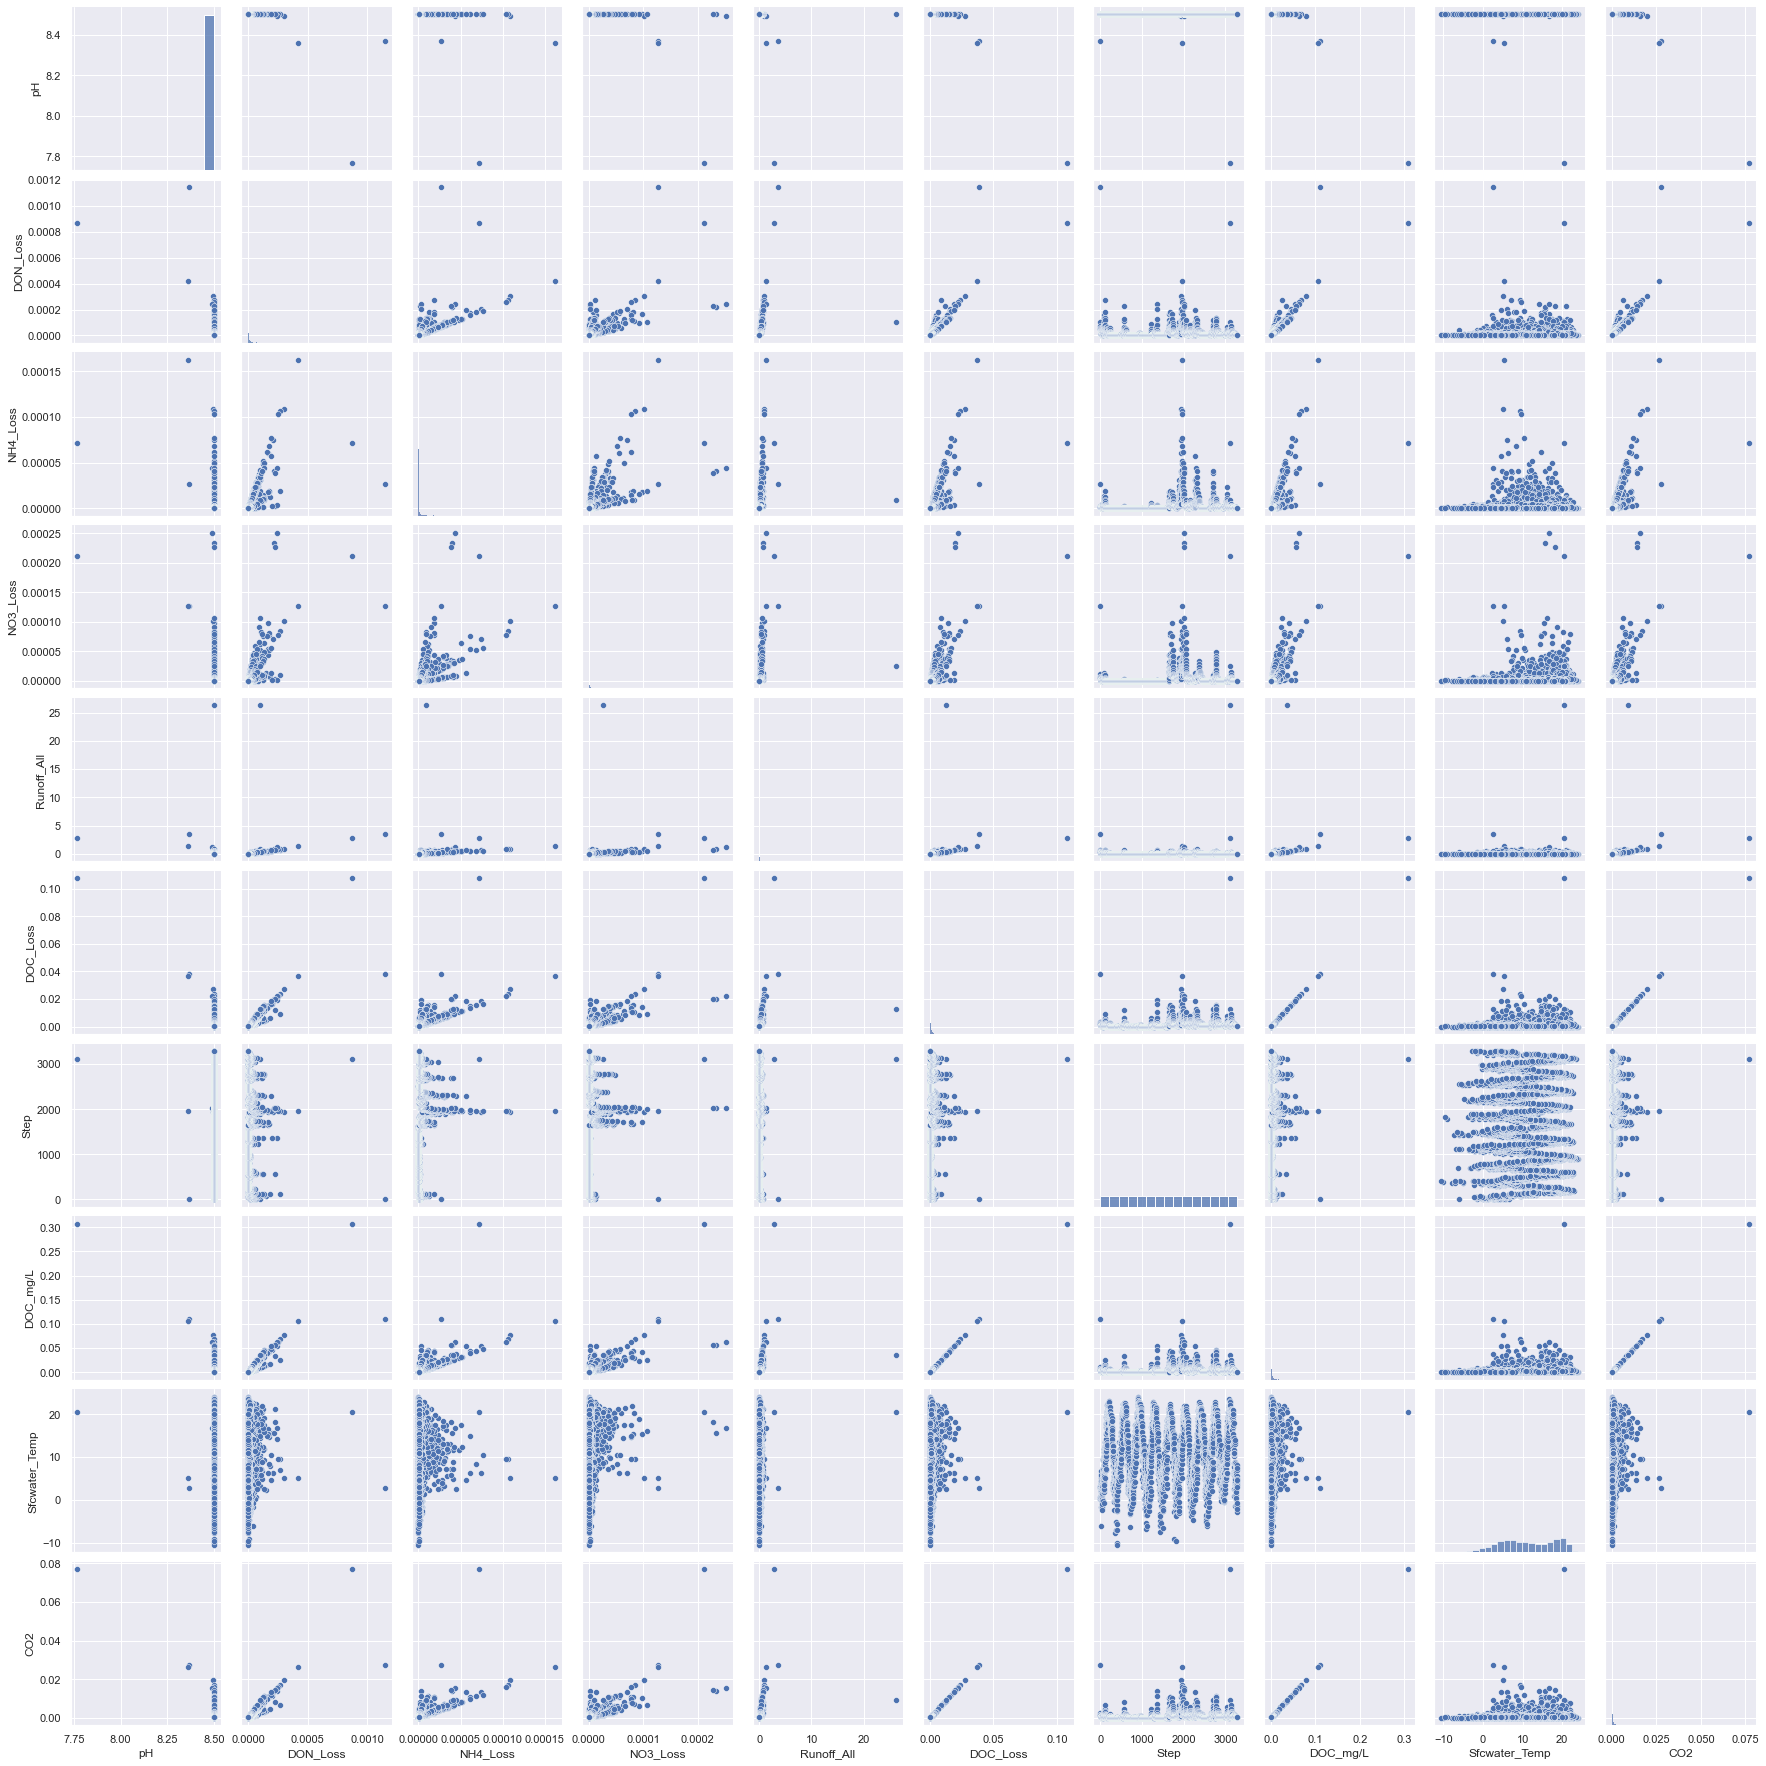

In [39]:
sns.pairplot(data_2.rename(columns={'pH_1T':'pH', 'NO3_Loss(gN/day/m2)_Delineated_Average':'NO3_Loss',
       'NH4_Loss(gN/day/m2)_Delineated_Average':'NH4_Loss',
       'DON_Loss(gN/day/m2)_Delineated_Average':'DON_Loss',
       'Runoff_All(mm/day)_Delineated_Average':'Runoff_All',
       'DOC_Loss(gC/day/m2)_Delineated_Average':'DOC_Loss',
       'Sfc_Water_Temp_C':'Sfcwater_Temp'}).drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140'}), dropna=True);
plt.show()

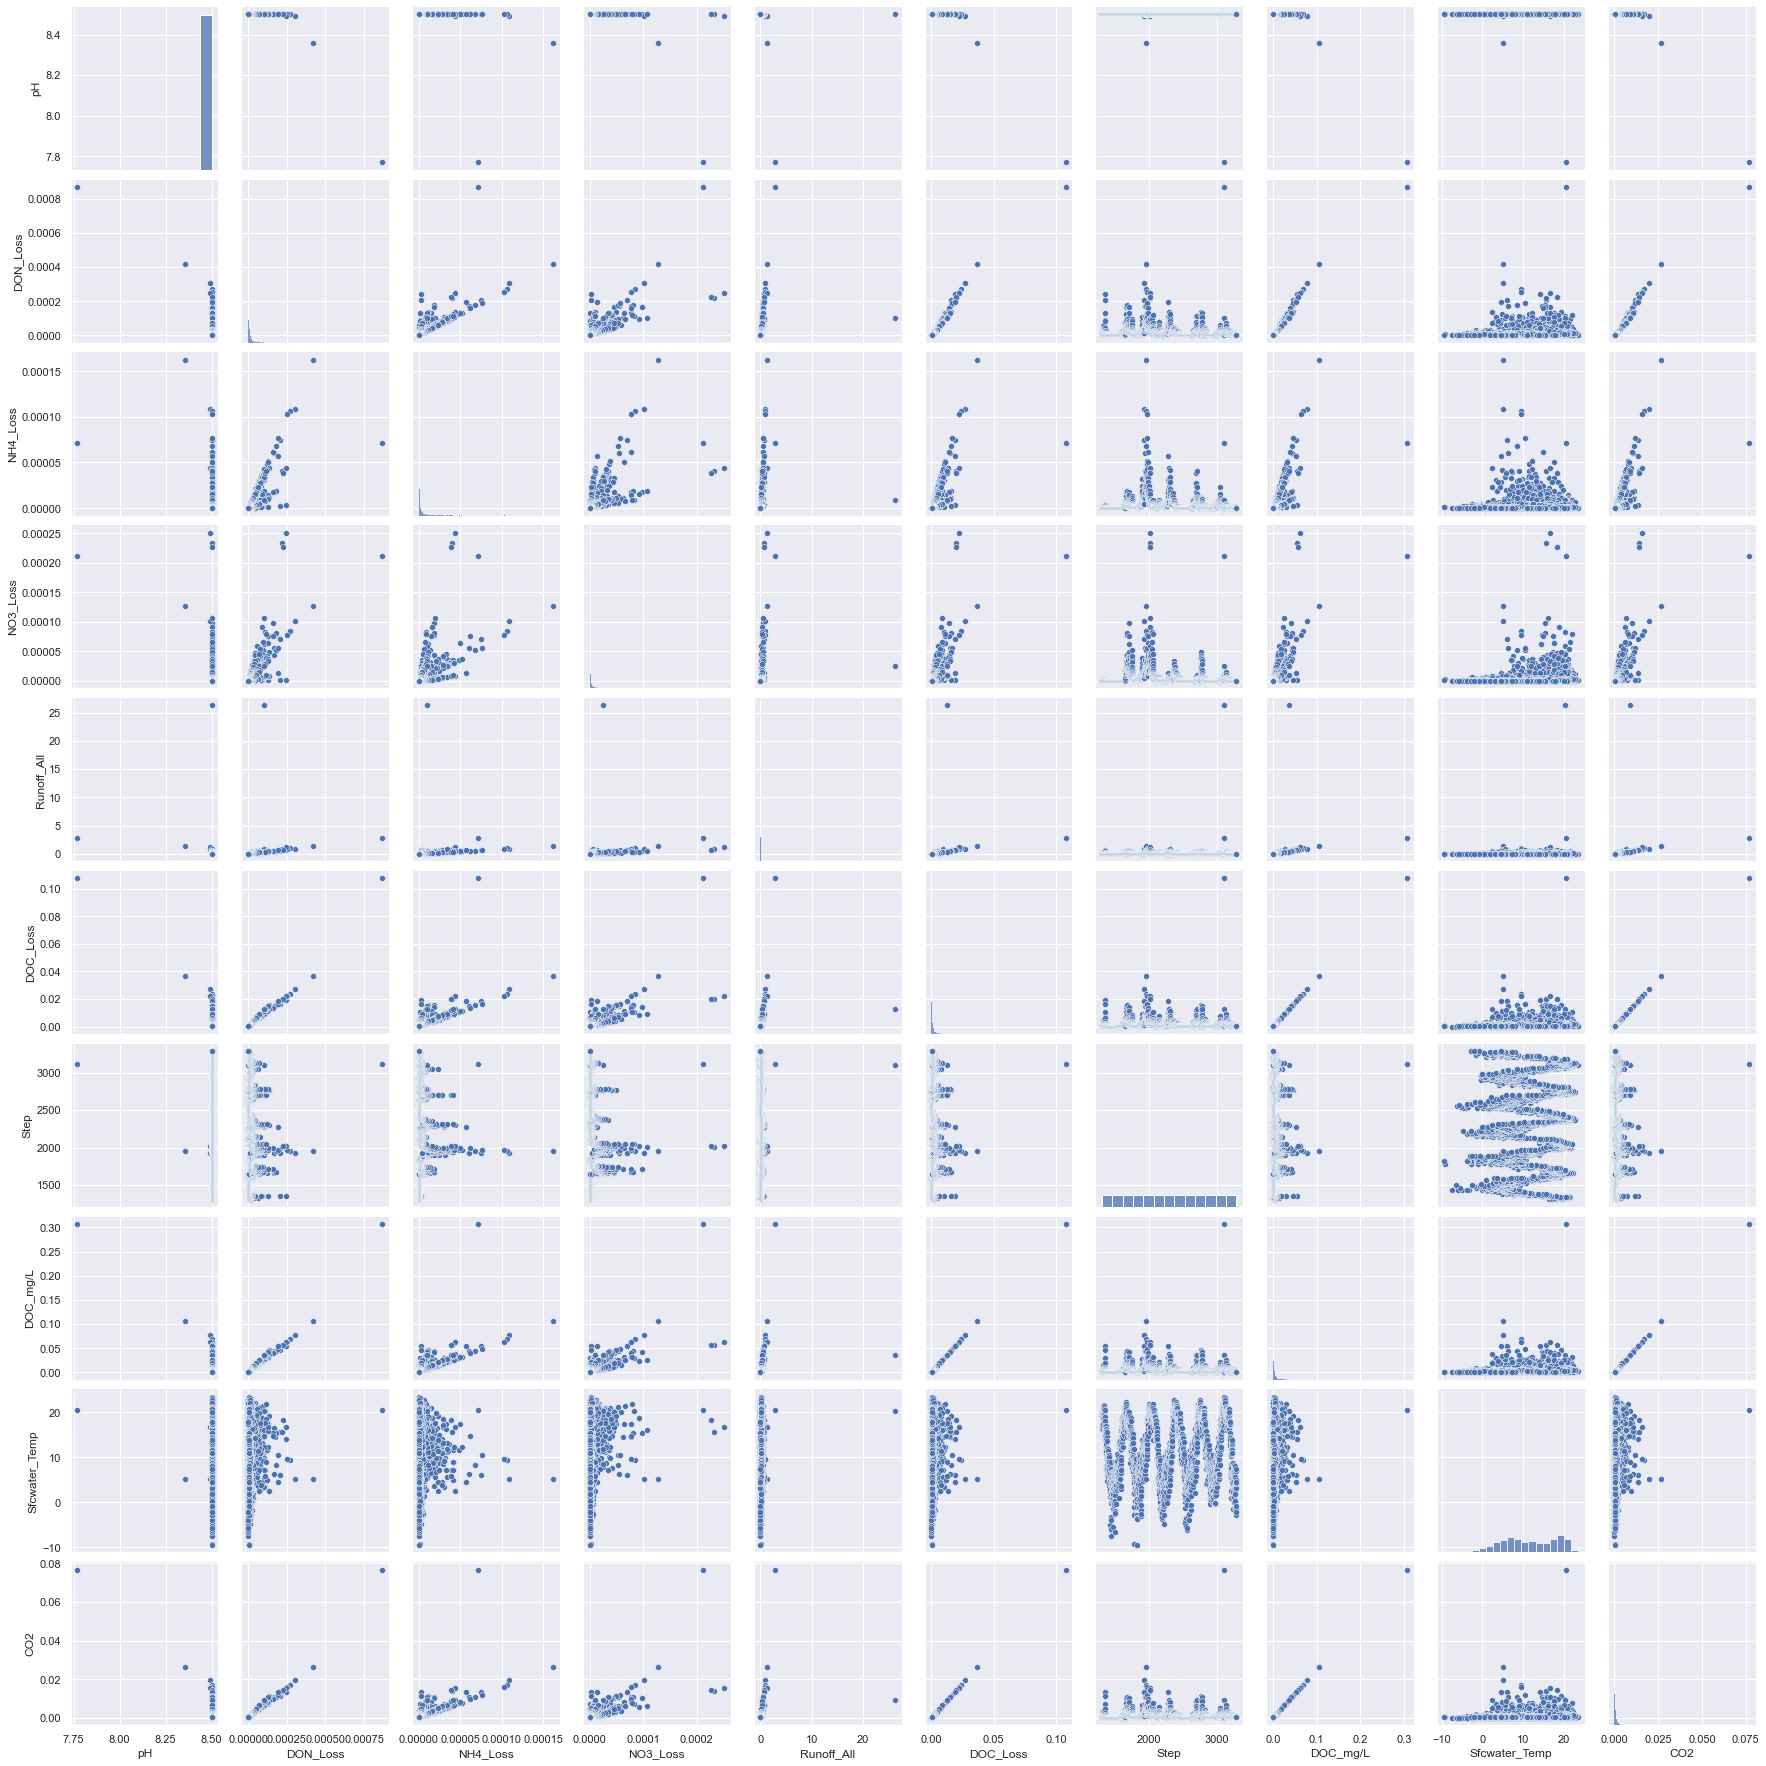

In [40]:
sns.pairplot(df_di_a.rename(columns={'pH_1T':'pH', 'NO3_Loss(gN/day/m2)_Delineated_Average':'NO3_Loss',
       'NH4_Loss(gN/day/m2)_Delineated_Average':'NH4_Loss',
       'DON_Loss(gN/day/m2)_Delineated_Average':'DON_Loss',
       'Runoff_All(mm/day)_Delineated_Average':'Runoff_All',
       'DOC_Loss(gC/day/m2)_Delineated_Average':'DOC_Loss',
       'Sfc_Water_Temp_C':'Sfcwater_Temp'}).drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140'}), dropna=True);
plt.show()

In [41]:
import numpy as np

In [42]:
perc = [.10, .25, .5, .75, .90]; print(type(perc));

<class 'list'>


In [43]:
data_2.drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140', 'Step'}).describe(percentiles=perc)

pH_1T  DON_Loss(gN/day/m2)_Delineated_Average  \
count  3287.000000                            3.287000e+03   
mean      8.499688                            1.367522e-05   
std       0.013189                            3.595378e-05   
min       7.769573                            1.531147e-07   
10%       8.500000                            4.551896e-07   
25%       8.500000                            1.189261e-06   
50%       8.500000                            4.681093e-06   
75%       8.500000                            1.333792e-05   
90%       8.500000                            3.263426e-05   
max       8.500000                            1.146204e-03   

       NH4_Loss(gN/day/m2)_Delineated_Average  \
count                            3.287000e+03   
mean                             2.273768e-06   
std                              7.169855e-06   
min                              1.088731e-09   
10%                              1.042981e-08   
25%                              4.258854e-08   
50%                              2.982597e-07   
75%                              1.550686e-06   
90%                              5.229984e-06   
max                              1.624303e-04   

       NO3_Loss(gN/day/m2)_Delineated_Average  \
count                            3.287000e+03   
mean                             3.364361e-06   
std                              1.220973e-05   
min                              1.490396e-11   
10%                              2.183020e-10   
25%                              1.307555e-09   
50%                              1.791758e-07   
75%                              1.558147e-06   
90%                              7.772628e-06   
max                              2.512616e-04   

       Runoff_All(mm/day)_Delineated_Average  \
count                            3287.000000   
mean                                0.045830   
std                                 0.472027   
min                                 0.000014   
10%                                 0.000240   
25%                                 0.001181   
50%                                 0.008562   
75%                                 0.030329   
90%                                 0.088680   
max                                26.255495   

       DOC_Loss(gC/day/m2)_Delineated_Average     DOC_mg/L  Sfc_Water_Temp_C  \
count                             3287.000000  3287.000000       3287.000000   
mean                                 0.001164     0.003325         11.248536   
std                                  0.002985     0.008529          6.931090   
min                                  0.000010     0.000029        -10.562500   
10%                                  0.000028     0.000081          2.262500   
25%                                  0.000083     0.000236          5.787500   
50%                                  0.000413     0.001180         11.112499   
75%                                  0.001189     0.003398         17.712502   
90%                                  0.002718     0.007766         20.412498   
max                                  0.107535     0.307244         24.087502   

               CO2  
count  3287.000000  
mean      0.000831  
std       0.002132  
min       0.000007  
10%       0.000020  
25%       0.000059  
50%       0.000295  
75%       0.000850  
90%       0.001941  
max       0.076811

In [44]:
df_di_a.drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140', 'Step'}).describe(percentiles=perc)

pH_1T  DON_Loss(gN/day/m2)_Delineated_Average  \
count  1978.000000                            1.978000e+03   
mean      8.499549                            1.762261e-05   
std       0.016734                            3.517022e-05   
min       7.769573                            3.802385e-07   
10%       8.500000                            1.218456e-06   
25%       8.500000                            3.399926e-06   
50%       8.500000                            7.720025e-06   
75%       8.500000                            1.787921e-05   
90%       8.500000                            4.037140e-05   
max       8.500000                            8.677883e-04   

       NH4_Loss(gN/day/m2)_Delineated_Average  \
count                            1.978000e+03   
mean                             3.578958e-06   
std                              8.946164e-06   
min                              1.220240e-08   
10%                              7.736682e-08   
25%                              2.862382e-07   
50%                              9.565497e-07   
75%                              3.149707e-06   
90%                              7.952876e-06   
max                              1.624303e-04   

       NO3_Loss(gN/day/m2)_Delineated_Average  \
count                            1.978000e+03   
mean                             5.366812e-06   
std                              1.512671e-05   
min                              2.709118e-10   
10%                              3.292112e-09   
25%                              1.588453e-07   
50%                              9.141984e-07   
75%                              3.734906e-06   
90%                              1.484865e-05   
max                              2.512616e-04   

       Runoff_All(mm/day)_Delineated_Average  \
count                            1978.000000   
mean                                0.062458   
std                                 0.600690   
min                                 0.000163   
10%                                 0.001438   
25%                                 0.005755   
50%                                 0.016546   
75%                                 0.044610   
90%                                 0.118245   
max                                26.255495   

       DOC_Loss(gC/day/m2)_Delineated_Average     DOC_mg/L  Sfc_Water_Temp_C  \
count                             1978.000000  1978.000000       1978.000000   
mean                                 0.001717     0.004906         11.347358   
std                                  0.003598     0.010279          6.693310   
min                                  0.000030     0.000086         -9.512501   
10%                                  0.000119     0.000340          2.765000   
25%                                  0.000354     0.001011          6.162500   
50%                                  0.000827     0.002362         11.300000   
75%                                  0.001787     0.005106         17.562500   
90%                                  0.003795     0.010844         20.037498   
max                                  0.107535     0.307244         23.487500   

               CO2  
count  1978.000000  
mean      0.001227  
std       0.002570  
min       0.000021  
10%       0.000085  
25%       0.000253  
50%       0.000591  
75%       0.001277  
90%       0.002711  
max       0.076811

In [45]:
df_di_a.loc[df_di_a['Condition'] == 'Prefire'].drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140', 'Step'}).describe(percentiles=perc)

pH_1T  DON_Loss(gN/day/m2)_Delineated_Average  \
count  313.0                            3.130000e+02   
mean     8.5                            6.807129e-06   
std      0.0                            2.166088e-05   
min      8.5                            3.802385e-07   
10%      8.5                            4.348105e-07   
25%      8.5                            5.143204e-07   
50%      8.5                            1.097996e-06   
75%      8.5                            4.445561e-06   
90%      8.5                            1.506587e-05   
max      8.5                            2.428741e-04   

       NH4_Loss(gN/day/m2)_Delineated_Average  \
count                            3.130000e+02   
mean                             1.218741e-07   
std                              2.809914e-07   
min                              1.220240e-08   
10%                              1.596332e-08   
25%                              2.642340e-08   
50%                              5.344822e-08   
75%                              1.043233e-07   
90%                              2.332056e-07   
max                              3.163735e-06   

       NO3_Loss(gN/day/m2)_Delineated_Average  \
count                            3.130000e+02   
mean                             5.835452e-08   
std                              2.086666e-07   
min                              2.709118e-10   
10%                              3.205971e-10   
25%                              3.846846e-10   
50%                              8.650339e-10   
75%                              2.948512e-08   
90%                              1.374771e-07   
max                              2.280195e-06   

       Runoff_All(mm/day)_Delineated_Average  \
count                             313.000000   
mean                                0.013547   
std                                 0.055060   
min                                 0.000163   
10%                                 0.000211   
25%                                 0.000280   
50%                                 0.000949   
75%                                 0.005879   
90%                                 0.027047   
max                                 0.669258   

       DOC_Loss(gC/day/m2)_Delineated_Average    DOC_mg/L  Sfc_Water_Temp_C  \
count                              313.000000  313.000000        313.000000   
mean                                 0.000535    0.001528          9.384385   
std                                  0.001701    0.004860          6.408665   
min                                  0.000030    0.000086         -7.412499   
10%                                  0.000034    0.000098          2.187500   
25%                                  0.000041    0.000116          5.037500   
50%                                  0.000087    0.000248          8.112500   
75%                                  0.000358    0.001022         14.787500   
90%                                  0.001181    0.003375         18.687500   
max                                  0.019124    0.054639         21.612500   

              CO2  
count  313.000000  
mean     0.000382  
std      0.001215  
min      0.000021  
10%      0.000025  
25%      0.000029  
50%      0.000062  
75%      0.000255  
90%      0.000844  
max      0.013660

In [46]:
df_di_a.loc[df_di_a['Condition'] == 'Postfire'].drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140', 'Step'}).describe(percentiles=perc)

pH_1T  DON_Loss(gN/day/m2)_Delineated_Average  \
count  1665.000000                            1.665000e+03   
mean      8.499464                            1.965579e-05   
std       0.018239                            3.681714e-05   
min       7.769573                            8.942770e-07   
10%       8.500000                            2.017671e-06   
25%       8.500000                            4.503009e-06   
50%       8.500000                            9.077195e-06   
75%       8.500000                            1.996118e-05   
90%       8.500000                            4.504261e-05   
max       8.500000                            8.677883e-04   

       NH4_Loss(gN/day/m2)_Delineated_Average  \
count                            1.665000e+03   
mean                             4.228848e-06   
std                              9.612638e-06   
min                              1.167787e-07   
10%                              2.688972e-07   
25%                              5.820889e-07   
50%                              1.294773e-06   
75%                              3.934383e-06   
90%                              9.244296e-06   
max                              1.624303e-04   

       NO3_Loss(gN/day/m2)_Delineated_Average  \
count                            1.665000e+03   
mean                             6.364738e-06   
std                              1.629579e-05   
min                              4.027329e-08   
10%                              1.185480e-07   
25%                              3.545970e-07   
50%                              1.370917e-06   
75%                              4.853285e-06   
90%                              1.750710e-05   
max                              2.512616e-04   

       Runoff_All(mm/day)_Delineated_Average  \
count                            1665.000000   
mean                                0.071653   
std                                 0.653909   
min                                 0.001072   
10%                                 0.003261   
25%                                 0.008723   
50%                                 0.020250   
75%                                 0.053448   
90%                                 0.136591   
max                                26.255495   

       DOC_Loss(gC/day/m2)_Delineated_Average     DOC_mg/L  Sfc_Water_Temp_C  \
count                             1665.000000  1665.000000       1665.000000   
mean                                 0.001940     0.005542         11.716374   
std                                  0.003811     0.010888          6.683227   
min                                  0.000099     0.000282         -9.512501   
10%                                  0.000226     0.000647          3.012500   
25%                                  0.000497     0.001421          6.462500   
50%                                  0.000978     0.002795         11.712500   
75%                                  0.002038     0.005822         18.012500   
90%                                  0.004254     0.012154         20.187500   
max                                  0.107535     0.307244         23.487500   

               CO2  
count  1665.000000  
mean      0.001385  
std       0.002722  
min       0.000070  
10%       0.000162  
25%       0.000355  
50%       0.000699  
75%       0.001455  
90%       0.003038  
max       0.076811

In [47]:
df_pools_dif = pools_di.drop(columns={'Unnamed: 0', 'Sfc_Water_Temp_C', 'Criteria', 'Condition'})

In [48]:
df_di_a.describe()

pH_1T   Unnamed: 0         Year  \
count  1978.000000  1978.000000  1978.000000   
mean      8.499549  2297.500000  2003.769464   
std       0.016734   571.143736     1.576393   
min       7.769573  1309.000000  2001.000000   
25%       8.500000  1803.250000  2002.000000   
50%       8.500000  2297.500000  2004.000000   
75%       8.500000  2791.750000  2005.000000   
max       8.500000  3286.000000  2006.000000   

       DON_Loss(gN/day/m2)_Delineated_Average  \
count                            1.978000e+03   
mean                             1.762261e-05   
std                              3.517022e-05   
min                              3.802385e-07   
25%                              3.399926e-06   
50%                              7.720025e-06   
75%                              1.787921e-05   
max                              8.677883e-04   

       NH4_Loss(gN/day/m2)_Delineated_Average  \
count                            1.978000e+03   
mean                             3.578958e-06   
std                              8.946164e-06   
min                              1.220240e-08   
25%                              2.862382e-07   
50%                              9.565497e-07   
75%                              3.149707e-06   
max                              1.624303e-04   

       NO3_Loss(gN/day/m2)_Delineated_Average  \
count                            1.978000e+03   
mean                             5.366812e-06   
std                              1.512671e-05   
min                              2.709118e-10   
25%                              1.588453e-07   
50%                              9.141984e-07   
75%                              3.734906e-06   
max                              2.512616e-04   

       Runoff_All(mm/day)_Delineated_Average  \
count                            1978.000000   
mean                                0.062458   
std                                 0.600690   
min                                 0.000163   
25%                                 0.005755   
50%                                 0.016546   
75%                                 0.044610   
max                                26.255495   

       DOC_Loss(gC/day/m2)_Delineated_Average         Step     DOC_mg/L  \
count                             1978.000000  1978.000000  1978.000000   
mean                                 0.001717  2297.500000     0.004906   
std                                  0.003598   571.143736     0.010279   
min                                  0.000030  1309.000000     0.000086   
25%                                  0.000354  1803.250000     0.001011   
50%                                  0.000827  2297.500000     0.002362   
75%                                  0.001787  2791.750000     0.005106   
max                                  0.107535  3286.000000     0.307244   

       Sfc_Water_Temp_C          CO2  Alk_140  
count       1978.000000  1978.000000   1978.0  
mean          11.347358     0.001227    140.0  
std            6.693310     0.002570      0.0  
min           -9.512501     0.000021    140.0  
25%            6.162500     0.000253    140.0  
50%           11.300000     0.000591    140.0  
75%           17.562500     0.001277    140.0  
max           23.487500     0.076811    140.0

In [49]:
df_di_a_lr = df_di_a.drop(columns={'Unnamed: 0', 'Criteria', 'Condition'}).apply(lambda x:stats.linregress(df_di_a.index, x), result_type='expand').rename(index={0: 'slope', 1: 'intercept', 2: 'rvalue', 3:'p-value', 4:'stderr'})



In [50]:
df_di_a_lr

pH_1T         Year  DON_Loss(gN/day/m2)_Delineated_Average  \
slope     -8.322628e-07     0.002713                           -4.831470e-09   
intercept  8.501461e+00  1997.536209                            2.872291e-05   
rvalue    -2.840519e-02     0.982970                           -7.846024e-02   
p-value    2.066722e-01     0.000000                            4.782069e-04   
stderr     6.588613e-07     0.000011                            1.381005e-09   

           NH4_Loss(gN/day/m2)_Delineated_Average  \
slope                               -9.984459e-10   
intercept                            5.872888e-06   
rvalue                              -6.374309e-02   
p-value                              4.567560e-03   
stderr                               3.516526e-10   

           NO3_Loss(gN/day/m2)_Delineated_Average  \
slope                               -3.422995e-09   
intercept                            1.323114e-05   
rvalue                              -1.292430e-01   
p-value                              7.992222e-09   
stderr                               5.908100e-10   

           Runoff_All(mm/day)_Delineated_Average  \
slope                                   0.000024   
intercept                               0.007902   
rvalue                                  0.022578   
p-value                                 0.315553   
stderr                                  0.000024   

           DOC_Loss(gC/day/m2)_Delineated_Average  Step      DOC_mg/L  \
slope                               -1.082642e-07   1.0 -3.093262e-07   
intercept                            1.966003e-03   0.0  5.617151e-03   
rvalue                              -1.718766e-02   1.0 -1.718766e-02   
p-value                              4.448735e-01   0.0  4.448735e-01   
stderr                               1.416806e-07   0.0  4.048016e-07   

           Sfc_Water_Temp_C           CO2  Alk_140  
slope              0.000758 -7.733155e-08      0.0  
intercept          9.606002  1.404288e-03    140.0  
rvalue             0.064675 -1.718766e-02      0.0  
p-value            0.004007  4.448735e-01      1.0  
stderr             0.000263  1.012004e-07      0.0

In [51]:
df_pools_dif.head()

DON_Pool(gN/m2)_Delineated_Average  DOC_Pool(gC/m2)_Delineated_Average  \
0                            4.914788                          178.332923   
1                            4.915756                          178.490644   
2                            4.916769                          178.652420   
3                            4.917760                          178.812267   
4                            4.918732                          178.964615   

   NH4_Pool(gN/m2)_Delineated_Average  NO3_Pool(gN/m2)_Delineated_Average  \
0                            0.653125                            0.017828   
1                            0.656919                            0.018524   
2                            0.652829                            0.018773   
3                            0.649688                            0.018661   
4                            0.648913                            0.018417   

   Step  Runoff_All(mm/day)_Delineated_Average  
0  1309                               0.014678  
1  1310                               0.022895  
2  1311                               0.028913  
3  1312                               0.020604  
4  1313                               0.015854

In [54]:
df_di_a['DOC_Pool'] = df_pools_dif['DOC_Pool(gC/m2)_Delineated_Average'].values; 
df_di_a['NH4_Pool'] = df_pools_dif['NH4_Pool(gN/m2)_Delineated_Average'].values;
df_di_a['NO3_Pool'] = df_pools_dif['NO3_Pool(gN/m2)_Delineated_Average'].values;
datetime_series = pd.date_range('1998-01-01', periods=3287, freq='D'); #When no date file is executed from DOC Check
datetime_series[1309:3288];
df_di_a['Date'] = datetime_series[1309:3288].values;

<ipython-input-54-e3b78498b3f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_di_a['DOC_Pool'] = df_pools_dif['DOC_Pool(gC/m2)_Delineated_Average'].values;
<ipython-input-54-e3b78498b3f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_di_a['NH4_Pool'] = df_pools_dif['NH4_Pool(gN/m2)_Delineated_Average'].values;
<ipython-input-54-e3b78498b3f5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [55]:
df_di_a['Criteria'] = str('Meets')

<ipython-input-55-63546f0ec94d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_di_a['Criteria'] = str('Meets')


In [56]:
df_di_a.describe(percentiles=perc)

pH_1T   Unnamed: 0         Year  \
count  1978.000000  1978.000000  1978.000000   
mean      8.499549  2297.500000  2003.769464   
std       0.016734   571.143736     1.576393   
min       7.769573  1309.000000  2001.000000   
10%       8.500000  1506.700000  2002.000000   
25%       8.500000  1803.250000  2002.000000   
50%       8.500000  2297.500000  2004.000000   
75%       8.500000  2791.750000  2005.000000   
90%       8.500000  3088.300000  2006.000000   
max       8.500000  3286.000000  2006.000000   

       DON_Loss(gN/day/m2)_Delineated_Average  \
count                            1.978000e+03   
mean                             1.762261e-05   
std                              3.517022e-05   
min                              3.802385e-07   
10%                              1.218456e-06   
25%                              3.399926e-06   
50%                              7.720025e-06   
75%                              1.787921e-05   
90%                              4.037140e-05   
max                              8.677883e-04   

       NH4_Loss(gN/day/m2)_Delineated_Average  \
count                            1.978000e+03   
mean                             3.578958e-06   
std                              8.946164e-06   
min                              1.220240e-08   
10%                              7.736682e-08   
25%                              2.862382e-07   
50%                              9.565497e-07   
75%                              3.149707e-06   
90%                              7.952876e-06   
max                              1.624303e-04   

       NO3_Loss(gN/day/m2)_Delineated_Average  \
count                            1.978000e+03   
mean                             5.366812e-06   
std                              1.512671e-05   
min                              2.709118e-10   
10%                              3.292112e-09   
25%                              1.588453e-07   
50%                              9.141984e-07   
75%                              3.734906e-06   
90%                              1.484865e-05   
max                              2.512616e-04   

       Runoff_All(mm/day)_Delineated_Average  \
count                            1978.000000   
mean                                0.062458   
std                                 0.600690   
min                                 0.000163   
10%                                 0.001438   
25%                                 0.005755   
50%                                 0.016546   
75%                                 0.044610   
90%                                 0.118245   
max                                26.255495   

       DOC_Loss(gC/day/m2)_Delineated_Average         Step     DOC_mg/L  \
count                             1978.000000  1978.000000  1978.000000   
mean                                 0.001717  2297.500000     0.004906   
std                                  0.003598   571.143736     0.010279   
min                                  0.000030  1309.000000     0.000086   
10%                                  0.000119  1506.700000     0.000340   
25%                                  0.000354  1803.250000     0.001011   
50%                                  0.000827  2297.500000     0.002362   
75%                                  0.001787  2791.750000     0.005106   
90%                                  0.003795  3088.300000     0.010844   
max                                  0.107535  3286.000000     0.307244   

       Sfc_Water_Temp_C          CO2  Alk_140     DOC_Pool     NH4_Pool  \
count       1978.000000  1978.000000   1978.0  1978.000000  1978.000000   
mean          11.347358     0.001227    140.0   271.748678     2.915789   
std            6.693310     0.002570      0.0    57.644098     1.171216   
min           -9.512501     0.000021    140.0   178.332923     0.635450   
10%            2.765000     0.000085    140.0   189.913659     1.065405   
25%            6.162500     0.000253    140.0   222.879132 

In [57]:
df_di_a.head()

pH_1T  Unnamed: 0  Year  DON_Loss(gN/day/m2)_Delineated_Average  \
1309    8.5        1309  2001                                0.000009   
1310    8.5        1310  2001                                0.000012   
1311    8.5        1311  2001                                0.000016   
1312    8.5        1312  2001                                0.000012   
1313    8.5        1313  2001                                0.000010   

      NH4_Loss(gN/day/m2)_Delineated_Average  \
1309                            9.970613e-08   
1310                            1.433409e-07   
1311                            1.811090e-07   
1312                            1.315001e-07   
1313                            1.030429e-07   

      NO3_Loss(gN/day/m2)_Delineated_Average  \
1309                            9.611053e-08   
1310                            1.380026e-07   
1311                            1.859202e-07   
1312                            1.394651e-07   
1313                            1.088340e-07   

      Runoff_All(mm/day)_Delineated_Average  \
1309                               0.014678   
1310                               0.022895   
1311                               0.028913   
1312                               0.020604   
1313                               0.015854   

      DOC_Loss(gC/day/m2)_Delineated_Average  Step  DOC_mg/L  \
1309                                0.000690  1309  0.001971   
1310                                0.000950  1310  0.002714   
1311                                0.001262  1311  0.003605   
1312                                0.000953  1312  0.002724   
1313                                0.000755  1313  0.002158   

      Sfc_Water_Temp_C       CO2  Alk_140 Condition Criteria    DOC_Pool  \
1309         20.112500  0.000493      140   Prefire    Meets  178.332923   
1310         19.737500  0.000678      140   Prefire    Meets  178.490644   
1311         19.962502  0.000901      140   Prefire    Meets  178.652420   
1312         19.812500  0.000681      140   Prefire    Meets  178.812267   
1313         19.287498  0.000540      140   Prefire    Meets  178.964615   

      NH4_Pool  NO3_Pool       Date  
1309  0.653125  0.017828 2001-08-02  
1310  0.656919  0.018524 2001-08-03  
1311  0.652829  0.018773 2001-08-04  
1312  0.649688  0.018661 2001-08-05  
1313  0.648913  0.018417 2001-08-06

In [58]:
#Defining all as Meets so that the .loc of the criteria mask will set the criteria to exceeds
df_di_a['Criteria'].unique()

array(['Meets'], dtype=object)

In [59]:
#Setting EPA Criteria Mask for those days where exceedance occured for NH4 or NO3 based on pH calculation
criteria_mask = df_di_a[((df_di_a['NH4_Pool'] > 0.569) & (df_di_a['pH_1T'] == 8.5) | ((df_di_a['NH4_Pool'] >  1.27) & (df_di_a['pH_1T'] == 8.0)) | (df_di_a['NO3_Pool'] > 1.59))];

In [60]:
#Those that 'exceed' drink water standards
criteria_mask
#export criteria mask to csv
#criteria_mask.to_csv('11192108NOV21A_WQX_Exceedance.csv')

In [61]:
df_di_a['Criteria'].loc[criteria_mask.index] = str('Exceeds')

C:\Users\kvenable\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\kvenable\Anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [62]:
df_di_a['Criteria'].unique()

array(['Exceeds', 'Meets'], dtype=object)

In [63]:
criteria_mask.drop(columns={'CO2', 'Alk_140', 'Condition', 'Criteria', 'Step', 'Unnamed: 0', 'Year'}).describe(percentiles=perc)#.to_csv('111921BC08NOV21a_exceed_allstats.csv')

In [64]:
criteria_mask.loc[criteria_mask['Condition'] == 'Prefire'].drop(columns={'CO2', 'Alk_140', 'Condition', 'Criteria', 'Step', 'Unnamed: 0', 'Year'}).describe(percentiles=perc)#.to_csv('111921BC08NOV21a_exceed_pfstats.csv')

In [65]:
criteria_mask.loc[criteria_mask['Condition'] == 'Postfire'].drop(columns={'CO2', 'Alk_140', 'Condition', 'Criteria', 'Unnamed: 0', 'Step', 'Year'}).describe(percentiles=perc)#.to_csv('111921BC08NOV21a_exceed_pofstats.csv')

In [66]:
bc_pf = df_di_a.loc[df_di_a['Condition'] == 'Prefire']; bc_pf.head()

pH_1T  Unnamed: 0  Year  DON_Loss(gN/day/m2)_Delineated_Average  \
1309    8.5        1309  2001                                0.000009   
1310    8.5        1310  2001                                0.000012   
1311    8.5        1311  2001                                0.000016   
1312    8.5        1312  2001                                0.000012   
1313    8.5        1313  2001                                0.000010   

      NH4_Loss(gN/day/m2)_Delineated_Average  \
1309                            9.970613e-08   
1310                            1.433409e-07   
1311                            1.811090e-07   
1312                            1.315001e-07   
1313                            1.030429e-07   

      NO3_Loss(gN/day/m2)_Delineated_Average  \
1309                            9.611053e-08   
1310                            1.380026e-07   
1311                            1.859202e-07   
1312                            1.394651e-07   
1313                            1.088340e-07   

      Runoff_All(mm/day)_Delineated_Average  \
1309                               0.014678   
1310                               0.022895   
1311                               0.028913   
1312                               0.020604   
1313                               0.015854   

      DOC_Loss(gC/day/m2)_Delineated_Average  Step  DOC_mg/L  \
1309                                0.000690  1309  0.001971   
1310                                0.000950  1310  0.002714   
1311                                0.001262  1311  0.003605   
1312                                0.000953  1312  0.002724   
1313                                0.000755  1313  0.002158   

      Sfc_Water_Temp_C       CO2  Alk_140 Condition Criteria    DOC_Pool  \
1309         20.112500  0.000493      140   Prefire  Exceeds  178.332923   
1310         19.737500  0.000678      140   Prefire  Exceeds  178.490644   
1311         19.962502  0.000901      140   Prefire  Exceeds  178.652420   
1312         19.812500  0.000681      140   Prefire  Exceeds  178.812267   
1313         19.287498  0.000540      140   Prefire  Exceeds  178.964615   

      NH4_Pool  NO3_Pool       Date  
1309  0.653125  0.017828 2001-08-02  
1310  0.656919  0.018524 2001-08-03  
1311  0.652829  0.018773 2001-08-04  
1312  0.649688  0.018661 2001-08-05  
1313  0.648913  0.018417 2001-08-06

In [67]:
bc_pf_lr = bc_pf.drop(columns={'Unnamed: 0', 'Criteria', 'Condition', 'Date'}).apply(lambda x:stats.linregress(bc_pf.index, x), result_type='expand').rename(index={0: 'slope', 1: 'intercept', 2: 'rvalue', 3:'p-value', 4:'stderr'})

In [68]:
#Brush Creek Pre-fire linear #.to_csv('111921BC08NOV21a_pflr.csv')regression
bc_pf_lr;
#bc_pf_lr.to_csv('111921BC08NOV21a_pflr.csv')

In [69]:
bc_pof = df_di_a.loc[df_di_a['Condition'] == 'Postfire'] 
bc_pof.head()
#bc_pof.describe(percentiles=perc).drop(columns={'Unnamed: 0'})

pH_1T  Unnamed: 0  Year  DON_Loss(gN/day/m2)_Delineated_Average  \
1622    8.5        1622  2002                                0.000012   
1623    8.5        1623  2002                                0.000012   
1624    8.5        1624  2002                                0.000012   
1625    8.5        1625  2002                                0.000011   
1626    8.5        1626  2002                                0.000010   

      NH4_Loss(gN/day/m2)_Delineated_Average  \
1622                            2.897305e-07   
1623                            3.446735e-07   
1624                            4.000442e-07   
1625                            3.878306e-07   
1626                            3.850257e-07   

      NO3_Loss(gN/day/m2)_Delineated_Average  \
1622                            1.220085e-07   
1623                            1.433886e-07   
1624                            1.722079e-07   
1625                            1.735678e-07   
1626                            1.787557e-07   

      Runoff_All(mm/day)_Delineated_Average  \
1622                               0.019813   
1623                               0.020648   
1624                               0.020426   
1625                               0.017420   
1626                               0.015321   

      DOC_Loss(gC/day/m2)_Delineated_Average  Step  DOC_mg/L  \
1622                                0.000965  1622  0.002758   
1623                                0.000975  1623  0.002786   
1624                                0.001001  1624  0.002859   
1625                                0.000868  1625  0.002481   
1626                                0.000785  1626  0.002244   

      Sfc_Water_Temp_C       CO2  Alk_140 Condition Criteria    DOC_Pool  \
1622         17.262500  0.000690      140  Postfire  Exceeds  195.398167   
1623         15.687500  0.000696      140  Postfire  Exceeds  195.547987   
1624         18.387500  0.000715      140  Postfire  Exceeds  195.742253   
1625         16.662500  0.000620      140  Postfire  Exceeds  195.908029   
1626         15.012501  0.000561      140  Postfire  Exceeds  196.048606   

      NH4_Pool  NO3_Pool       Date  
1622  0.850320  0.016252 2002-06-11  
1623  0.887169  0.018690 2002-06-12  
1624  0.919587  0.021644 2002-06-13  
1625  0.952300  0.024904 2002-06-14  
1626  0.983157  0.028150 2002-06-15

In [70]:
bc_pof.describe(percentiles=perc).drop(columns={'Unnamed: 0', 'Year', 'Step'})

pH_1T  DON_Loss(gN/day/m2)_Delineated_Average  \
count  1665.000000                            1.665000e+03   
mean      8.499464                            1.965579e-05   
std       0.018239                            3.681714e-05   
min       7.769573                            8.942770e-07   
10%       8.500000                            2.017671e-06   
25%       8.500000                            4.503009e-06   
50%       8.500000                            9.077195e-06   
75%       8.500000                            1.996118e-05   
90%       8.500000                            4.504261e-05   
max       8.500000                            8.677883e-04   

       NH4_Loss(gN/day/m2)_Delineated_Average  \
count                            1.665000e+03   
mean                             4.228848e-06   
std                              9.612638e-06   
min                              1.167787e-07   
10%                              2.688972e-07   
25%                              5.820889e-07   
50%                              1.294773e-06   
75%                              3.934383e-06   
90%                              9.244296e-06   
max                              1.624303e-04   

       NO3_Loss(gN/day/m2)_Delineated_Average  \
count                            1.665000e+03   
mean                             6.364738e-06   
std                              1.629579e-05   
min                              4.027329e-08   
10%                              1.185480e-07   
25%                              3.545970e-07   
50%                              1.370917e-06   
75%                              4.853285e-06   
90%                              1.750710e-05   
max                              2.512616e-04   

       Runoff_All(mm/day)_Delineated_Average  \
count                            1665.000000   
mean                                0.071653   
std                                 0.653909   
min                                 0.001072   
10%                                 0.003261   
25%                                 0.008723   
50%                                 0.020250   
75%                                 0.053448   
90%                                 0.136591   
max                                26.255495   

       DOC_Loss(gC/day/m2)_Delineated_Average     DOC_mg/L  Sfc_Water_Temp_C  \
count                             1665.000000  1665.000000       1665.000000   
mean                                 0.001940     0.005542         11.716374   
std                                  0.003811     0.010888          6.683227   
min                                  0.000099     0.000282         -9.512501   
10%                                  0.000226     0.000647          3.012500   
25%                                  0.000497     0.001421          6.462500   
50%                                  0.000978     0.002795         11.712500   
75%                                  0.002038     0.005822         18.012500   
90%                                  0.004254     0.012154         20.187500   
max                                  0.107535     0.307244         23.487500   

               CO2  Alk_140     DOC_Pool     NH4_Pool     NO3_Pool  
count  1665.000000   1665.0  1665.000000  1665.000000  1665.000000  
mean      0.001385    140.0   287.357590     3.277639     0.706143  
std       0.002722      0.0    49.039973     0.888924     0.270708  
min       0.000070    140.0   195.398167     0.850320     0.016252  
10%       0.000162    140.0   222.225521     2.052713     0.318683  
25%       0.000355    140.0   245.478581     2.707772     0.538498  
50%       0.000699    140.0   293.793575     3.158735     0.710740  
75%       0.001455    140.0   332.912162     3.989451     0.915569  
90%       0.003038    140.0   353.373901     4.586103     1.035810  
max       0.076811    140.0   370.878906     4.974419     1.501369

In [71]:
bc_pof_lr = bc_pof.drop(columns={'Unnamed: 0', 'Criteria', 'Condition', 'Date'}).apply(lambda x:stats.linregress(bc_pof.index, x), result_type='expand').rename(index={0: 'slope', 1: 'intercept', 2: 'rvalue', 3:'p-value', 4:'stderr'})

In [72]:
bc_pof_lr;
#bc_pof_lr.to_csv('111921BC08NOV21a_poflr.csv')

In [73]:
 #Oneway ANOVA between pre and post fire nitrates
stats.f_oneway(bc_pf['NO3_Pool'], bc_pof['NO3_Pool'])

F_onewayResult(statistic=2094.3372790096832, pvalue=2.09286321548e-312)

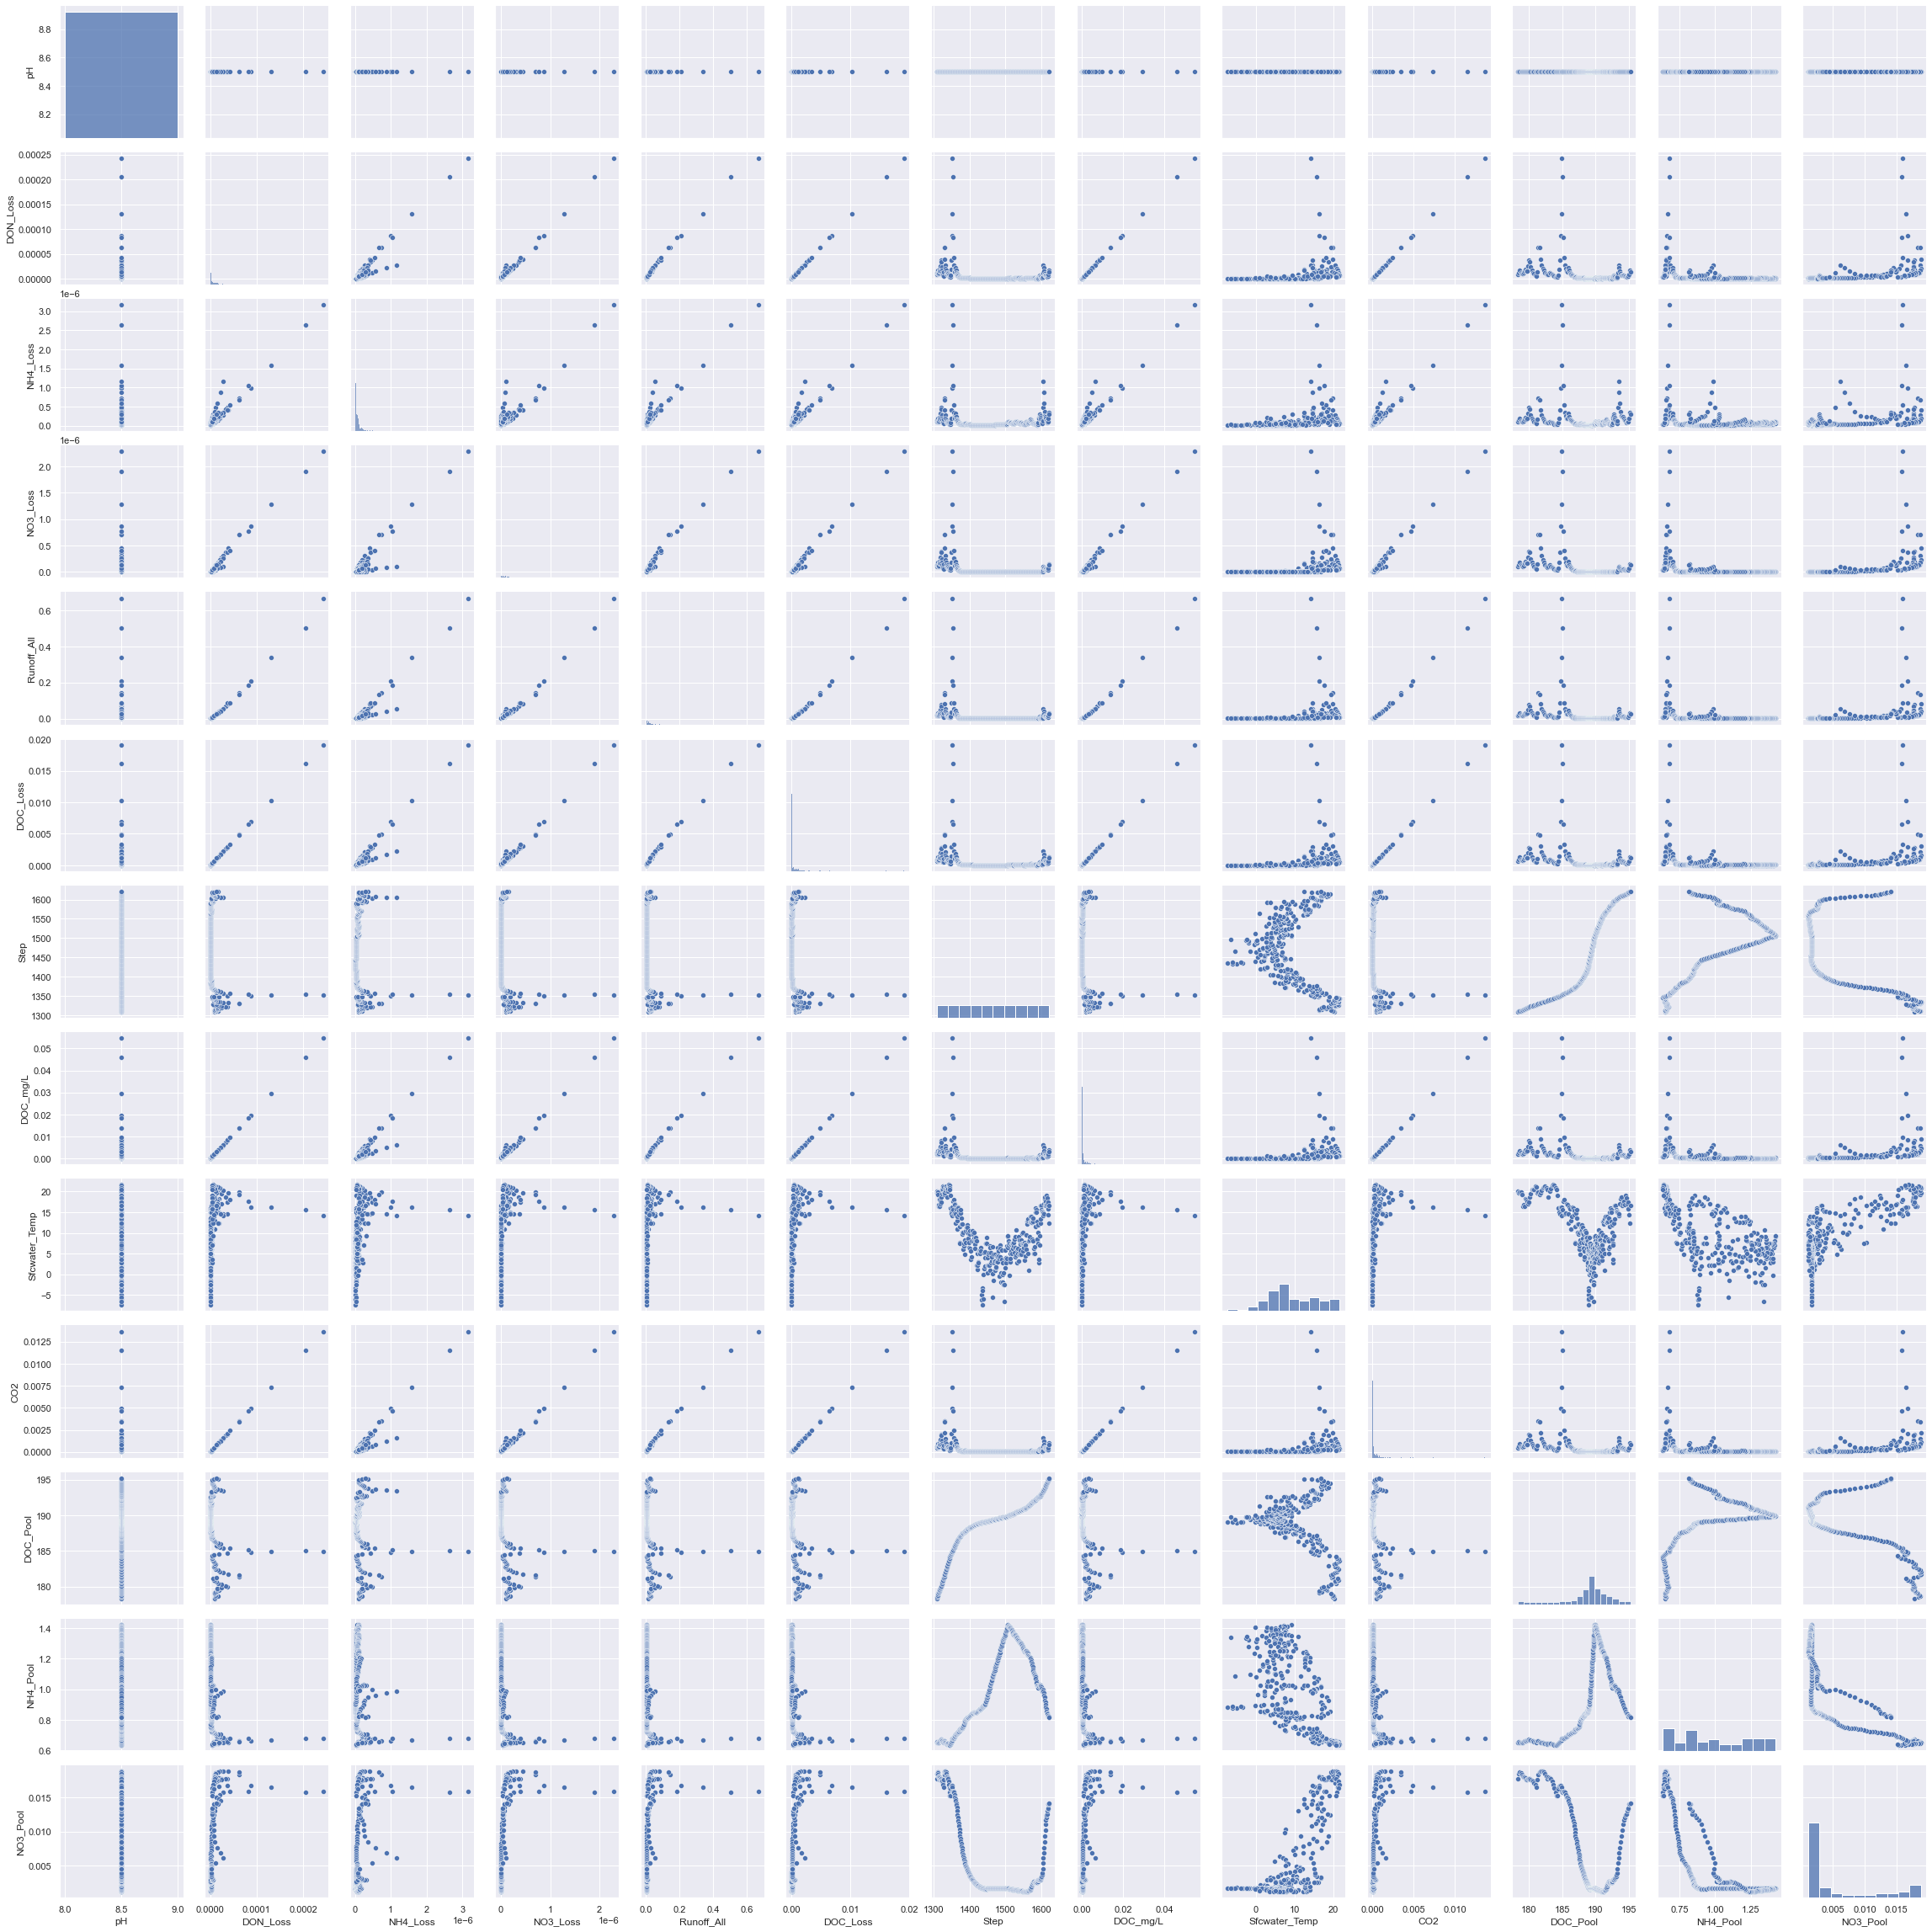

In [74]:
sns.pairplot(bc_pf.rename(columns={'pH_1T':'pH', 'NO3_Loss(gN/day/m2)_Delineated_Average':'NO3_Loss',
       'NH4_Loss(gN/day/m2)_Delineated_Average':'NH4_Loss',
       'DON_Loss(gN/day/m2)_Delineated_Average':'DON_Loss',
       'Runoff_All(mm/day)_Delineated_Average':'Runoff_All',
       'DOC_Loss(gC/day/m2)_Delineated_Average':'DOC_Loss',
       'Sfc_Water_Temp_C':'Sfcwater_Temp'}).drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140'}), dropna=True)

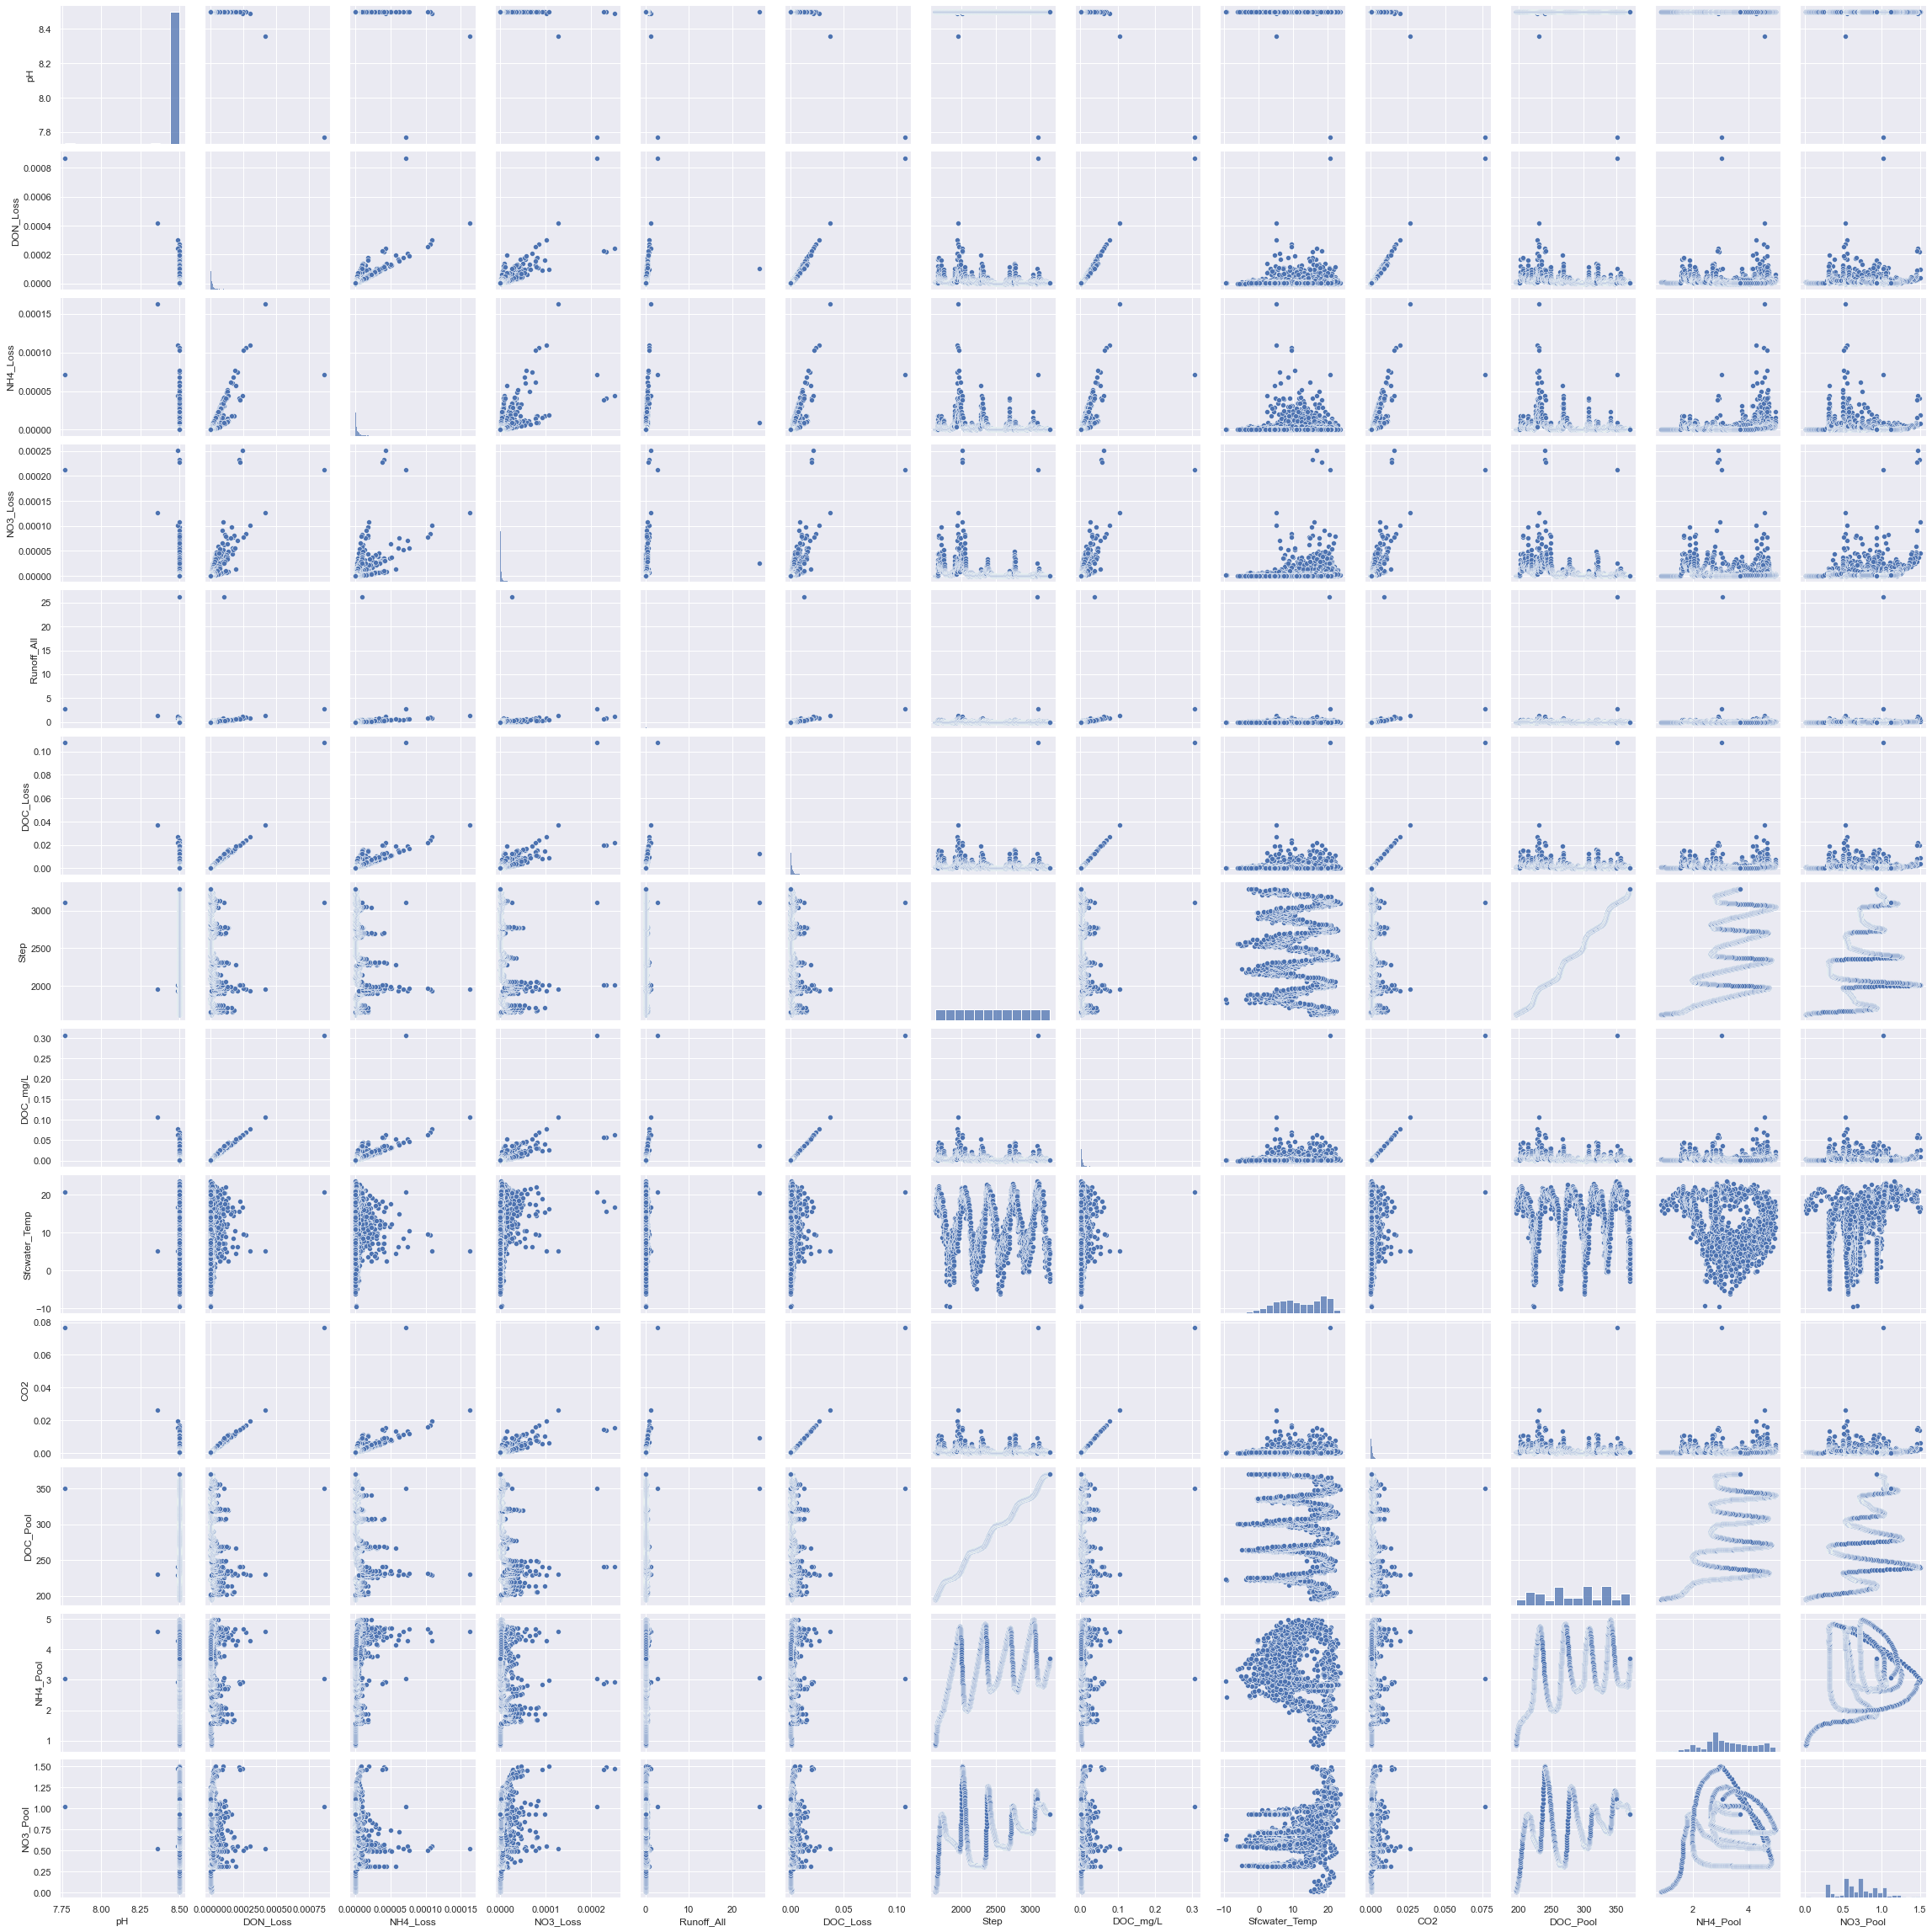

In [75]:
sns.pairplot(bc_pof.rename(columns={'pH_1T':'pH', 'NO3_Loss(gN/day/m2)_Delineated_Average':'NO3_Loss',
       'NH4_Loss(gN/day/m2)_Delineated_Average':'NH4_Loss',
       'DON_Loss(gN/day/m2)_Delineated_Average':'DON_Loss',
       'Runoff_All(mm/day)_Delineated_Average':'Runoff_All',
       'DOC_Loss(gC/day/m2)_Delineated_Average':'DOC_Loss',
       'Sfc_Water_Temp_C':'Sfcwater_Temp'}).drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140'}), dropna=True)

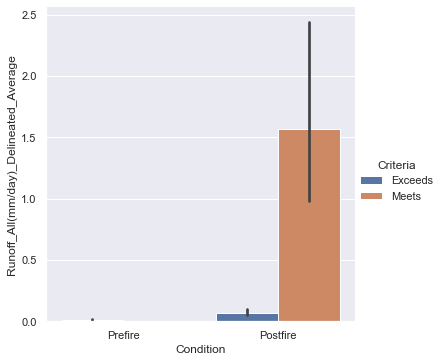

In [76]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='Runoff_All(mm/day)_Delineated_Average',
            hue='Criteria')

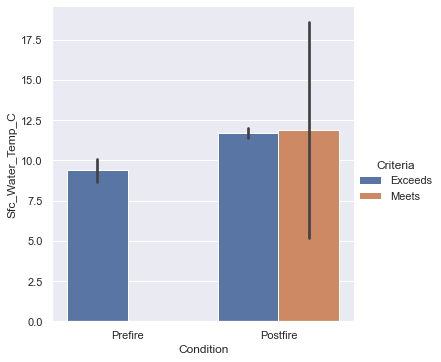

In [77]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='Sfc_Water_Temp_C',
            hue='Criteria')

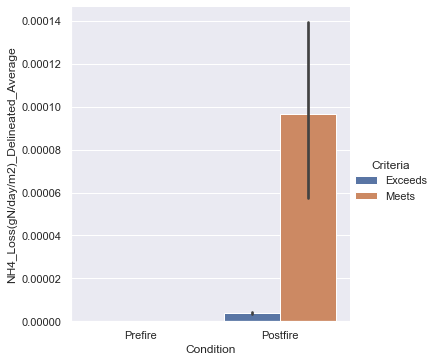

In [78]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='NH4_Loss(gN/day/m2)_Delineated_Average',
            hue='Criteria')

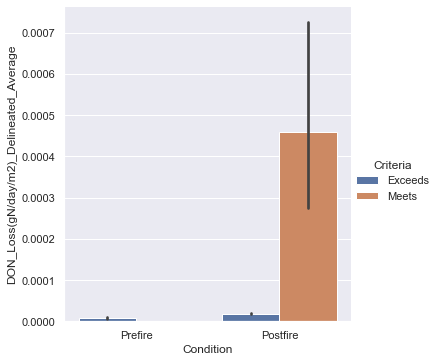

In [79]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='DON_Loss(gN/day/m2)_Delineated_Average',
            hue='Criteria')

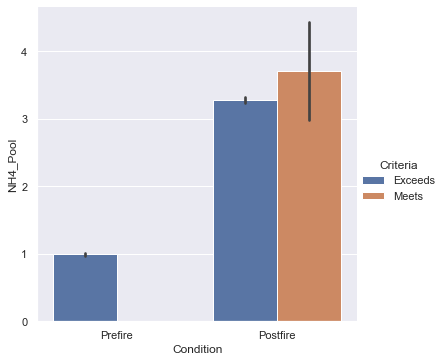

In [80]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='NH4_Pool',
            hue='Criteria')

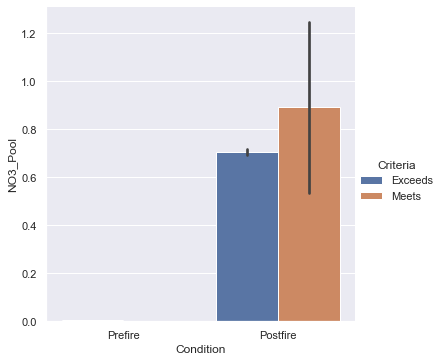

In [81]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='NO3_Pool',
            hue='Criteria')

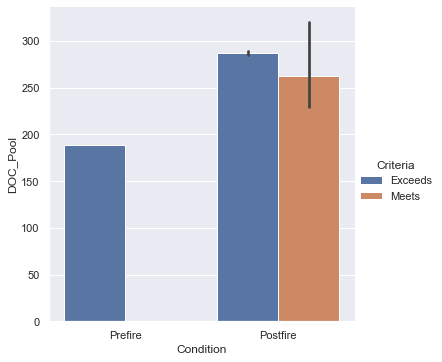

In [82]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='DOC_Pool',
            hue='Criteria')

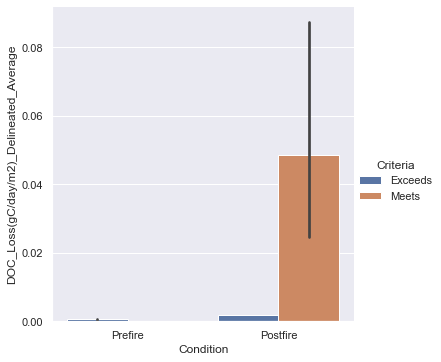

In [83]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='DOC_Loss(gC/day/m2)_Delineated_Average',
            hue='Criteria')

In [84]:
df_di_a#.to_csv('111921_BC08NOV21A_WQX_All_di.csv')

In [85]:
calc_pH(0.7, 22.9, 4.7, 50)

CO2 Estimate 15.909090909090908
Exponent value 5.853692464000001
H2CO3 value 1.400578760267948e-06
pkw= 1e-14
Alpha value= 2.2281934832444628e-05
SQRT of Alpha= 0.004720374437737395
A value 2.326023550138511
B value 0.43429448190325176
C value 0.00944074887547479



6.232002101795975

In [86]:
#data_df.loc[:,['new_ph_column']]=data_df.apply(lambda row: calc_pH(row['CO2_calc'],row['Sfcwater_Temp_C'],row['DOC_mg/L'], row['Alk_200']),axis=1)


In [87]:
#data_df.head()